In [3]:

from platform import python_version

print("Current Python Version-", python_version())


Current Python Version- 3.7.14


In [4]:
import numpy
numpy.version.version

'1.21.6'

In [5]:
pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


# ANALYSIS OF GAME SALES DATA


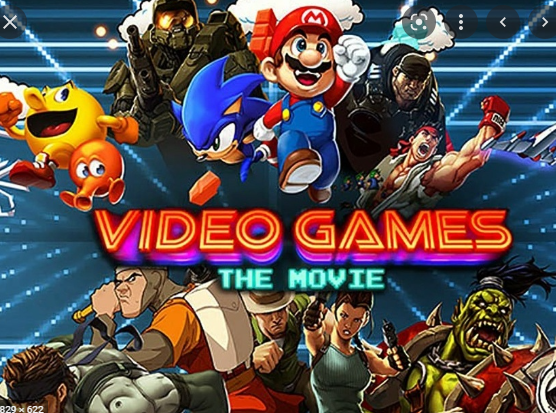

This project was built with the interest of knowing the behavior of the interest of young people and adults in the purchase of games, which styles of games were more buyers and to assemble a profile line of the gamer user data from 1980 to 2020. Our main purpose is to answer as follows questions :     
* What are the best games sold by genre?? 
* What are the best launch pads for games ? 
* What defines a good game ? 
* What is the expected behavior in the next 10 years??

The dataset was originally collected by the Kaggle online platform, known as a competition site for use and techniques applied to Machine Learning.
* Dataset : https://www.kaggle.com/code/lunaliu2/video-game-sales-analysis/data?select=Video_Games_Sales_as_at_22_Dec_2016.csv
* Web Scraping : https://www.vgchartz.com/

Here we can see a brief explanation of the content of the sampled dataset

* Name - Title the game
* Platform - Wich platform was released the game (e.g. PC, Wii etc.)
* Year_of_Release - Year of release the game 
* Genre - Game Genre (as classified by vgchartz)
* Publisher -The company that published the release
* NA_Sales - North America sales (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in japan (in millions)
* Other_Sales - Venda em outos países (in millions)
* Global_Sales - Sell ​​in other countries (in millions)
* Critic_Score - Rounded average score given to a game by critic (um inteiro de 100)
* Critic_Count - Number of critical scores given
* User_Score -Rounded average score given to a game by vgchartz users
* User_Count -Number of user scores provided
* Developer - company that developed the video game
* Rating -Official ESRB rating




# Important insights we want to extract from the data:
 * What is the best game in terms of revenue and best review by platform?
 * What was the best year out of the 40 years worked in terms of billing?
 * How to know the game's billing before its launch, based on the user profile.
 * How much does the rating or genre of the game influence its sales?


### Library Import

* Below we have a set of data that elucidates the sale of games



In [6]:
#Fazendo importação das bibliotecas necessárias para extração, transformação e carregamento dos dados.
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px 


In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

print('matplotlib: {}'.format(matplotlib.__version__))

The scikit-learn version is 1.0.2.
matplotlib: 3.2.2


In [8]:

vg = pd.read_csv('/content/drive/MyDrive/Colab Notebook/vgsales.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebook/Video_Games_Sales_as_at_22_Dec_2016.csv') # Lendo o dataset com pandas



## 1 .Description and overview of raw data

In [9]:
data.info() # Checking data type information and the presence of null data, memory used, number of columns
# and how many lines does the data have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In an overview, we have 16 thousand sales values ​​to work with equally with Name, Platform, Genre, Year of release.
Lower values ​​in the case of Developers and Rating and Score. Below are better details:
* Name > 16 thousand
* Platform > 16 thousand
* Sales > 16 thousand
* Year of Launch > 16 thousand
* User review and review > 8K
* Rating > 10K

In [ ]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

This other dataset was generated by Web Scraping in 2022 containing more relevant information and we can relate your tables to increase our dataset
* Name > 55 thousand
* Platform > 55 thousand
* Sales > 15 thousand
* Year of Launch > 55 thousand
* User review and review > 6K
* Rating > 20K

In [ ]:
vg.fillna(np.nan)
vg.head(5)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In the general dataset we see many columns that are not used for our purpose that we are going to discard and these will not change our resul

In [ ]:
data.head(5) #printando as primeiras 10 linhas do dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
colvg = vg.columns
coldata = data.columns
print ( " COLUMNS DO DATASET VG {} \n  COLUMNS  DO DATASET DATA {}".format(colvg , coldata) ) 
vg = vg.rename(columns= {'ESRB_Rating':'Rating','Year':'Year_of_Release','PAL_Sales':'EU_Sales'})

 COLUMNS DO DATASET VG Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object') 
  COLUMNS  DO DATASET DATA Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


Deleting columns useless for our purpose


In [12]:
#xboxone = xboxone.drop(columns=['Pos','Global'])
data = data.drop(columns=['Global_Sales','Critic_Count'])
vg = vg.drop(columns=['Rank', 'basename', 'VGChartz_Score','Total_Shipped', 'Global_Sales', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'])

Making a union of the table vg and data , expanding our dataset to work with the data


In [13]:
vgsales = pd.merge(data,vg, on =['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
        'User_Score', 'Developer', 'Rating' ], how = 'outer' )
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72507 entries, 0 to 72506
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             72505 non-null  object 
 1   Platform         72507 non-null  object 
 2   Year_of_Release  71259 non-null  float64
 3   Genre            72505 non-null  object 
 4   Publisher        72453 non-null  object 
 5   NA_Sales         29679 non-null  float64
 6   EU_Sales         29904 non-null  float64
 7   JP_Sales         23758 non-null  float64
 8   Other_Sales      32237 non-null  float64
 9   Critic_Score     14673 non-null  float64
 10  User_Score       7925 non-null   float64
 11  User_Count       7590 non-null   float64
 12  Developer        65867 non-null  object 
 13  Rating           33569 non-null  object 
dtypes: float64(8), object(6)
memory usage: 8.3+ MB


In [14]:
vgsales = vgsales.drop_duplicates(subset=['Genre','Name','Platform','Year_of_Release'])
vgsales['Global_Sales'] = vgsales['EU_Sales'] + vgsales['JP_Sales']+ vgsales['NA_Sales'] + vgsales['Other_Sales'] #MONTANDO COLUNA DE VENDAS GLOBAIS 
vgsales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72502,Indivisible,PC,2019.0,Role-Playing,505 Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lab Zero Games,NaN,NaN
72503,Lost Ember,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Lost Ember,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72505,Lost Ember,XOne,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


## 1.2 Null Values ​​& Correlation


In [ ]:
print("rows before removing missing values", vgsales.shape[0])
df2 = vgsales.replace(np.nan, 0)
df2 = vgsales.dropna()
df2.isna().sum()

rows before removing missing values 60124


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [ ]:
df2.shape

(6824, 15)

### Querying correlated data



In [ ]:
vgsales.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Global_Sales
Year_of_Release,1.000000,-0.099977,0.016785,-0.171823,0.036432,-0.031945,-0.237164,0.175365,-0.065861
NA_Sales,-0.099977,1.000000,0.744864,0.437453,0.631354,0.142013,0.086085,0.246426,0.936453
EU_Sales,0.016785,0.744864,1.000000,0.412979,0.731002,0.108634,0.055767,0.283357,0.896944
JP_Sales,-0.171823,0.437453,0.412979,1.000000,0.281483,0.023455,0.127287,0.075635,0.600974
Other_Sales,0.036432,0.631354,0.731002,0.281483,1.000000,0.107316,0.057420,0.238979,0.753743
Critic_Score,-0.031945,0.142013,0.108634,0.023455,0.107316,1.000000,0.472477,0.264409,0.133919
User_Score,-0.237164,0.086085,0.055767,0.127287,0.057420,0.472477,1.000000,0.027030,0.089108
User_Count,0.175365,0.246426,0.283357,0.075635,0.238979,0.264409,0.027030,1.000000,0.265037
Global_Sales,-0.065861,0.936453,0.896944,0.600974,0.753743,0.133919,0.089108,0.265037,1.000000


Certain fields have high missing values ​​due to them not being applicable to certain games. For example, the ESRB was established in 1994, which means that many video games created before that are unlikely to have a rating.


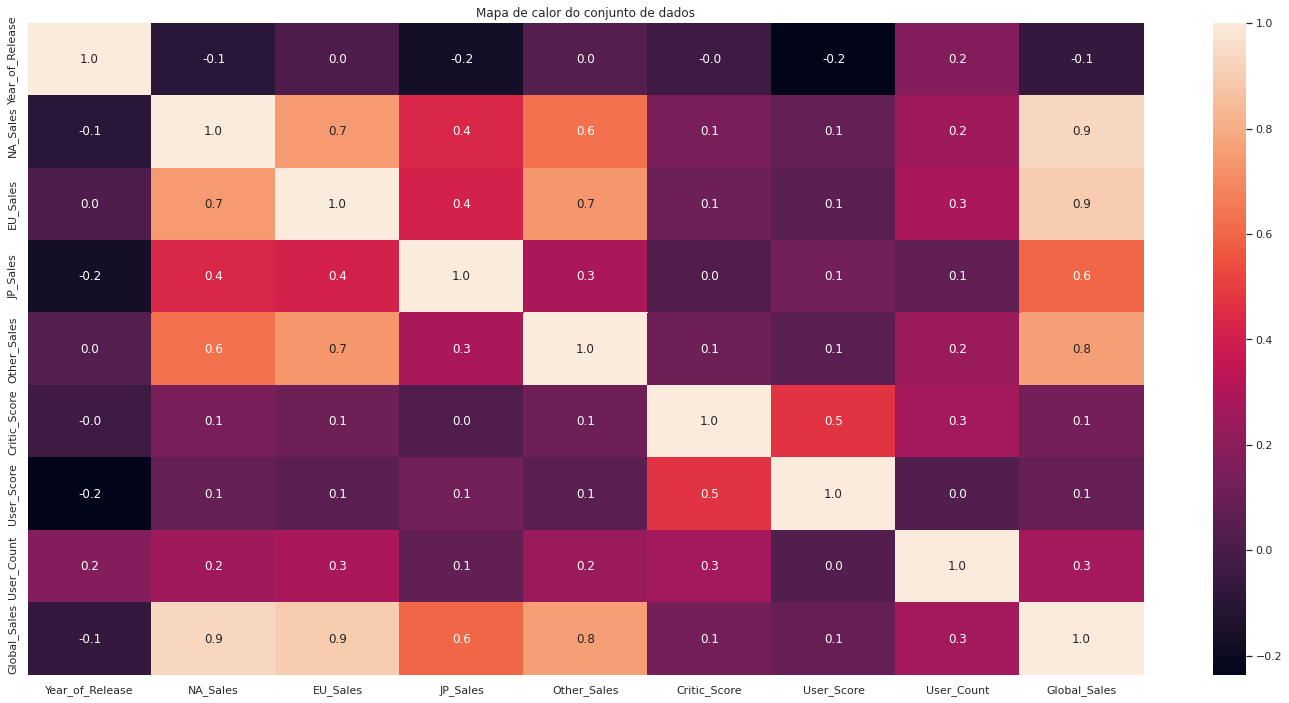

In [ ]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
#  CORRELAÇÕES
corr_matriz = vgsales.corr()
plt.figure(figsize=(25,12))
plt.title("Mapa de calor do conjunto de dados")
sns.heatmap(corr_matriz, annot=True, fmt = '.1f' )


Immediately, we can see how all NA, EU, JP, Other and Global sales figures are highly correlated. Multicollinearity of global sales is expected as it is the sum of all sales in the region. It's also fair to expect that a video game that has had high sales in one region will also sell well in another region.

Interestingly, JP sales appear to have the weakest correlation compared to the other markets, possibly suggesting that there is less overlap between markets in Japan than in other regions.

Likewise, review score and user score also appear to be strongly correlated. Since a game that scored highly among critics is likely to be seen as a good game, users are likely to score highly as well, and vice versa.

Year of release appears to have very little correlation to sales and scoring metrics

## 1.3 Sales Analysis


Here we will see a graphic description of frequencies of each of the attributes of the dataset


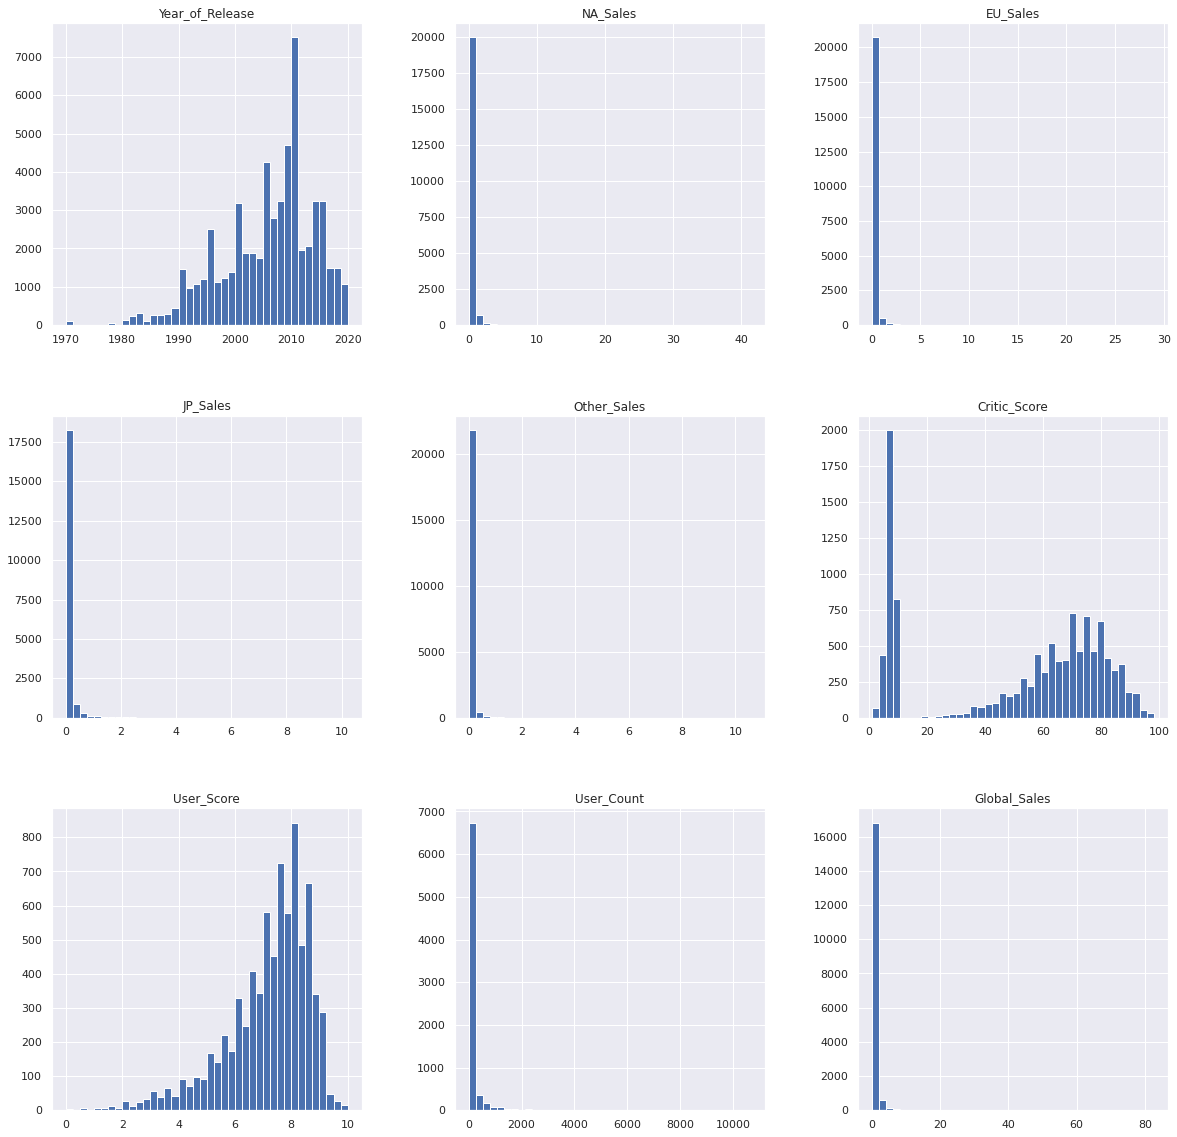

In [ ]:
%matplotlib inline 
vgsales.hist(bins=40, figsize=(20,20))
plt.show()

# CRITICAL SCORE ANALYSIS


Here we will show the most known platforms, therefore, most relevant in variables to facilitate their plotting with matplotlib.
We note that many games may not have a reviewer or user rating. We chose to ignore those video games for this exploration.

Critics scores are rated from 0 to 100, while User scores are rated from 0.0 to 10.0, making them directly comparable.

CRITIC SCORE DAOOS VIEW


In [ ]:
vgsales = vgsales.fillna(np.nan)

In [ ]:
print ('Descrição \n',vgsales.Critic_Score.describe())

Descrição 
 count    11463.000000
mean        51.043802
std         30.398051
min          1.000000
25%          8.600000
50%         63.000000
75%         76.000000
max         98.000000
Name: Critic_Score, dtype: float64


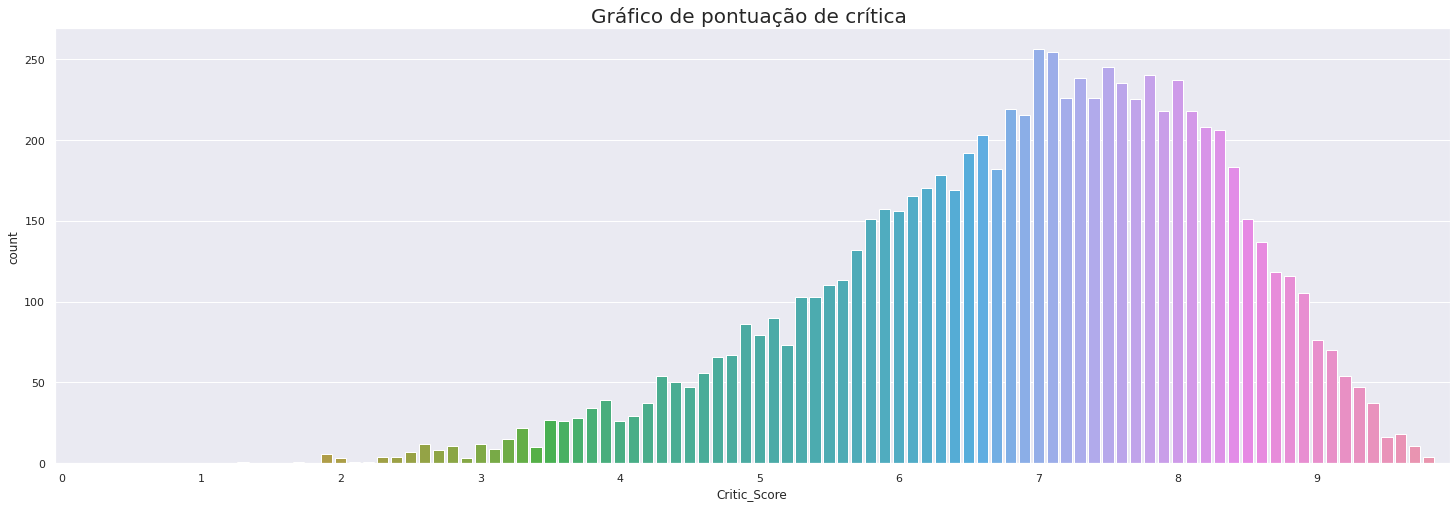

In [ ]:
plt.figure(figsize=(25,8))
plt.title("Gráfico de pontuação de crítica ", size = 20)
critic_score_count = sns.countplot(data=vgsales, x=data.Critic_Score, order = range(0,100))
critic_score_count.set_xticks(range(0,100,10))

In [ ]:
crit = vgsales[['Critic_Score']].value_counts()
freq  = vgsales[['Critic_Score']].value_counts(normalize = True)*100
dataset = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
dataset.rename_axis("Pontuação da Crítica", axis = "columns",inplace= True )
dataset

Pontuação da Crítica,Frequencia,Percentual(%)
Critic_Score,,
70.0,256,2.233272
71.0,254,2.215825
75.0,245,2.137311
78.0,240,2.093693
73.0,238,2.076245
...,...,...
2.4,1,0.008724
2.2,1,0.008724
1.9,1,0.008724


VIEWING USER CRITICAL DATA


In [ ]:
vgsales.User_Score.describe()

count    7782.000000
mean        7.148047
std         1.508067
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max        10.000000
Name: User_Score, dtype: float64

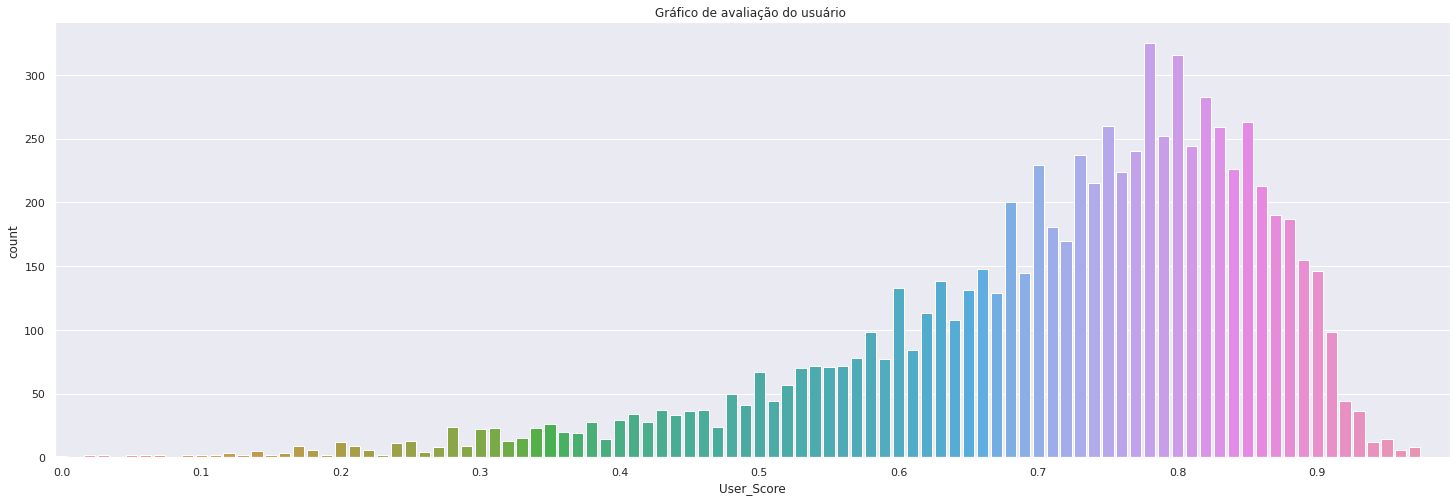

In [ ]:
plt.figure(figsize=(25,8))
plt.title("Gráfico de avaliação do usuário ")
user_score_count = sns.countplot(data=vgsales, x=vgsales.User_Score, order = [x/10 for x in range(0,100)])
user_score_count.set_xticks(range(0,100,10))

In [ ]:
crit = vgsales[['User_Score']].value_counts()
freq  = vgsales[['User_Score']].value_counts(normalize = True)*100
usuario = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
usuario.rename_axis("Pontuação da Crítica de usuário", axis = "columns",inplace= True )
usuario

Pontuação da Crítica de usuário,Frequencia,Percentual(%)
User_Score,,
7.8,325,4.176304
8.0,316,4.060653
8.2,283,3.636597
8.5,263,3.379594
7.5,260,3.341043
...,...,...
1.3,2,0.025700
1.5,2,0.025700
1.9,2,0.025700


We can see that the critics' and users' scores have a negative slope, with the users' scores having a greater negative slope. This is because users tend to be more willing to give lower scores as the minimum score for critics is 13 and the minimum score for users is 0.

We can also see interesting patterns, especially with user scores, certain numbers are heavily favored. Integers like 6.0, 7.0, and 8.0 tend to be given more often than others. Interestingly, 7.8 is the user's scoring mode, despite not being an integer.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
vgsales['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
72502     NaN
72503     NaN
72504     NaN
72505     NaN
72506     NaN
Name: Critic_Score, Length: 60124, dtype: float64

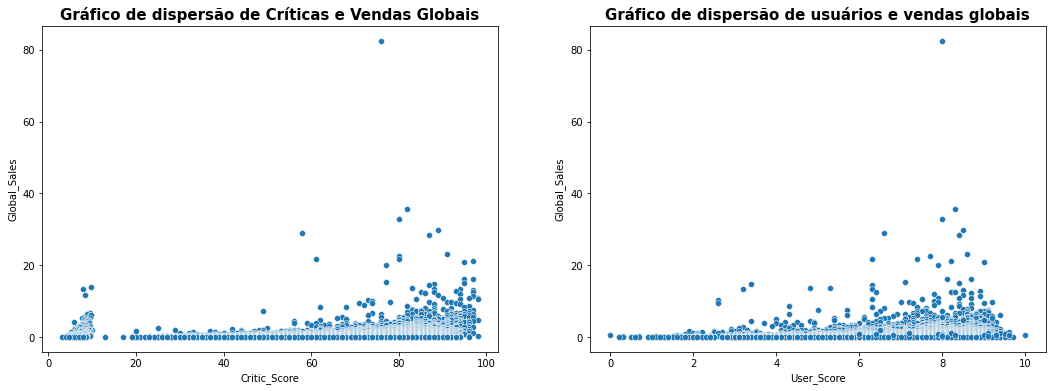

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

ax[0].set_title("Gráfico de dispersão de Críticas e Vendas Globais", size =15, fontweight = 'bold')
sns.scatterplot(data=vgsales, x='Critic_Score', y='Global_Sales', ax=ax[0])


ax[1].set_title("Gráfico de dispersão de usuários e vendas globais", size =15, fontweight = 'bold')
sns.scatterplot(data=vgsales, x='User_Score', y='Global_Sales', ax=ax[1])


We can see that, in general, the games that sold the most globally received higher scores from Critics and Users. Interestingly, the distributions are skewed more negatively towards critics than towards users.

We may have an outlier of high-revenue games with criticism between 7 and 8, with this we infer that the quality of the game and its reception may also not match its profitability, in view of other factors such as:
* Most awaited game
* fan service
* Nolstagy

Does this still apply to less popular games?

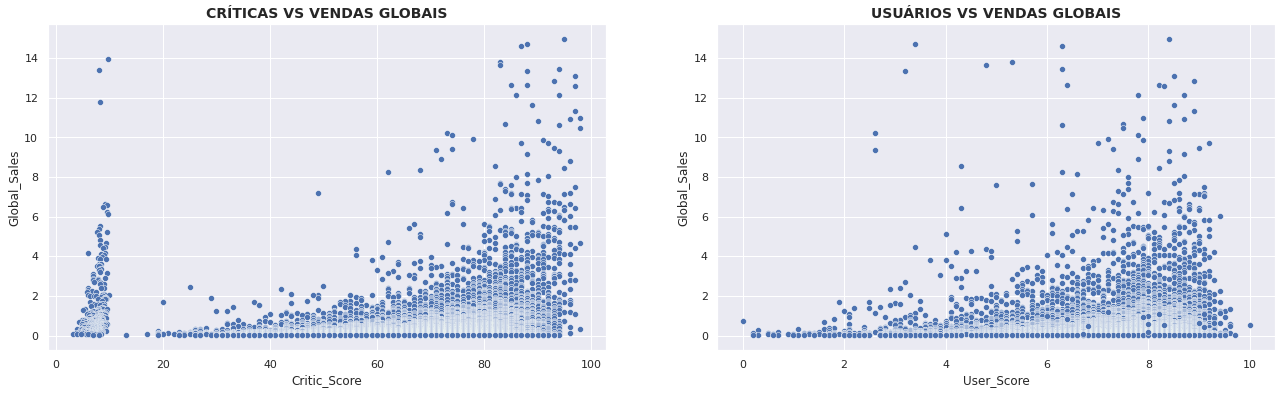

In [ ]:
# Scatter graph of Critic Score and Global Sales. Uncapped

fig, axlimited = plt.subplots(1, 2, figsize=(22,6))

axlimited[0].set_title("CRÍTICAS VS VENDAS GLOBAIS", fontweight = 'bold', size = 14)
sns.scatterplot(data=vgsales[vgsales.Global_Sales <= 15], x='Critic_Score', y='Global_Sales', ax=axlimited[0]) # VAMOS DAR UM ZOOM NOS DADOS

axlimited[1].set_title("USUÁRIOS VS VENDAS GLOBAIS", fontweight = 'bold', size = 14)
sns.scatterplot(data=vgsales[vgsales.Global_Sales <= 15], x='User_Score', y='Global_Sales', ax=axlimited[1])

SUBDIVIDING THE PLATFORMS FOR AN INDIVIDUAL ANALYSIS


In [ ]:
PC ,Wii, PS3 ,PS4 = vgsales[vgsales['Platform'] == 'PC'], vgsales[vgsales['Platform'] == 'Wii'],  vgsales[vgsales['Platform'] == 'PS3'],  vgsales[vgsales['Platform'] == 'PS4']
DS ,X360, PSP ,XOne = vgsales[vgsales['Platform'] == 'DS'], vgsales[vgsales['Platform'] == 'X360'],  vgsales[vgsales['Platform'] == 'PSP'] ,  vgsales[vgsales['Platform'] == 'XOne']
PS2 ,DS_3  = vgsales[vgsales['Platform'] == 'PS2'], vgsales[vgsales['Platform'] == '3DS']


We will review the top 20 most critically rated games, however certain games may be available on more than 1 platform. It soon becomes easier to work by filtering the platform and getting to know the top 20 best-rated games according to their launch platform.
It is common for games to be released initially for their respective consoles and after an indefinite period a release for platforms such as PC is announced. Due to this knowledge we thought it best to filter this analysis according to the platform


In [ ]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
critica = 'Critic_Score'
usuario = 'User_Score'

In [ ]:
def topgames(game,critica):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2[critica].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  plt.figure(figsize=(25,9))
  plt.title("Top 20 Games mais bem avaliados pela crítica", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x= critica, y='Name', color = cmap)
  plt.xlabel(critica, size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  if critica == 'Critic_Score':
    ay.xaxis.set_ticks(np.arange(0, 110, 25))
  else:
    ay.xaxis.set_ticks(np.arange(0, 12, 2.5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

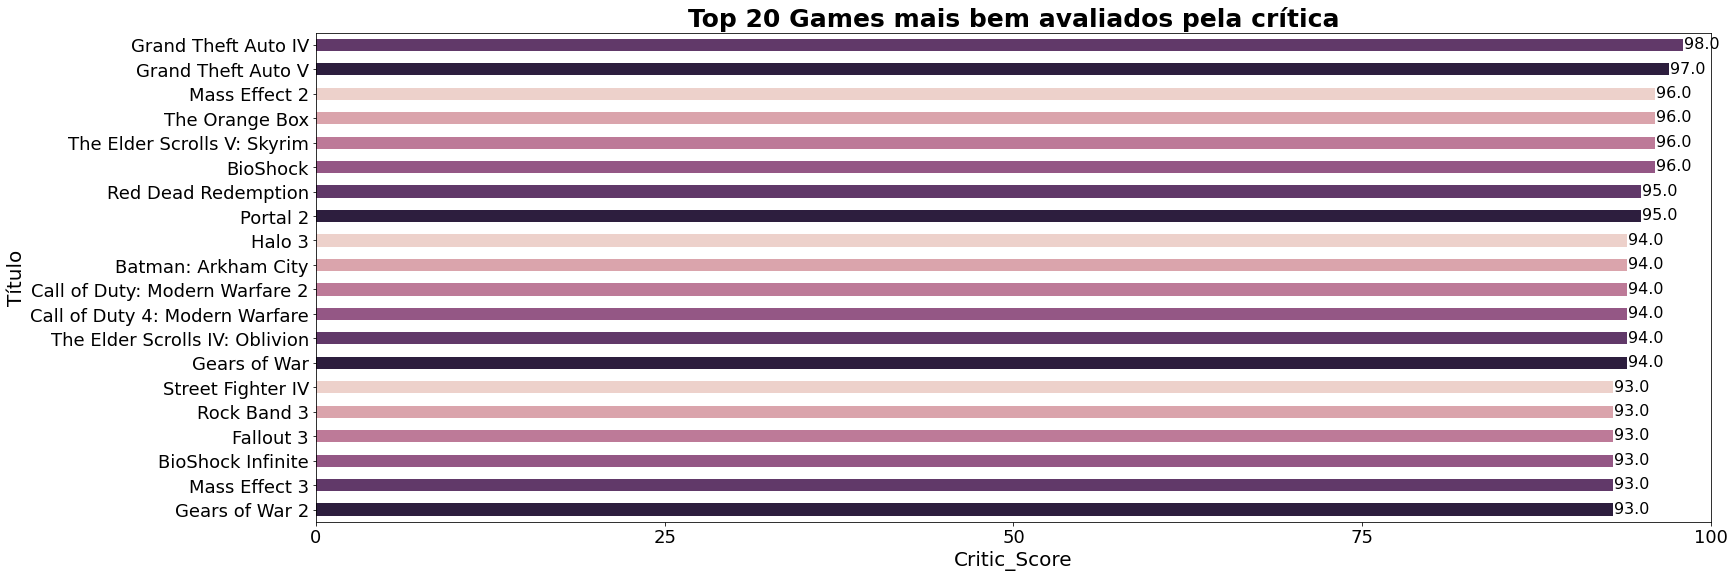

In [ ]:
topgames(X360,critica)

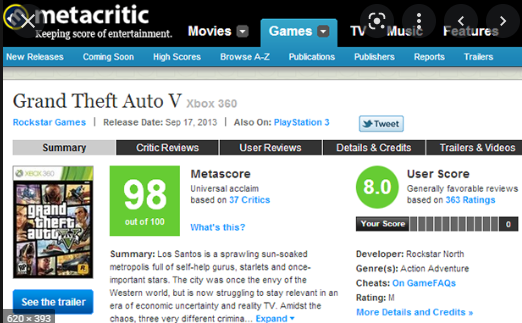

Grand Theft Auto V was one of the most highly rated games by critics, released in 2013 and is still listed as one of the best games ever made by Rockstar by the company Take-Two-Interact. Its success was so global that today it is released for all platforms since the PS3 and Xbox360 generation.

Awards won:

* VGX - Best Soundtrack (2013)
* BAFTA Video Game Award - Best Multiplayer(2014)
* VGX - Best Game of the Year (2013)
* BAFTA Video Game Award- Best Design (2013)
* BAFTA Video Game Award- British Game (2013)
* VGX - Most anticipated game (2013)
* The Game Award for Best Mastering (2014)

In addition to an analysis of the best evaluation by critics, we also believe that an analysis of the best value of billing by platform is valid.

In [ ]:
def topfaturamento(game):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2['Global_Sales'].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  
  plt.figure(figsize=(20,8))
  plt.title("Top 20 Games mais bem lucrativos do mercado", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x=critica, y='Name', color = cmap)
  plt.xlabel("Vendas Globais", size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  ay.xaxis.set_ticks(np.arange(0, 30, 5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

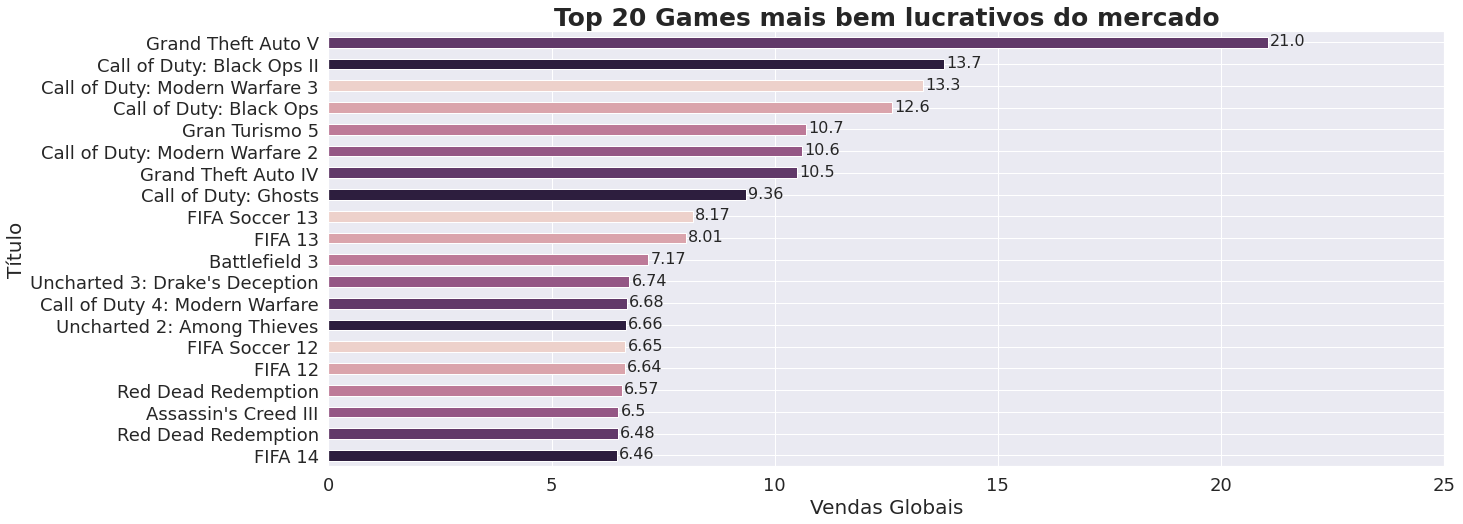

In [ ]:
topfaturamento(PS3)

In [ ]:
vgsales.query('Name == "Grand Theft Auto V" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,97.0,8.2,3994.0,Rockstar North,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,97.0,8.1,3711.0,Rockstar North,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,97.0,8.3,2899.0,Rockstar North,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,97.0,7.9,764.0,Rockstar North,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,96.0,7.9,3756.0,Rockstar North,M,1.17


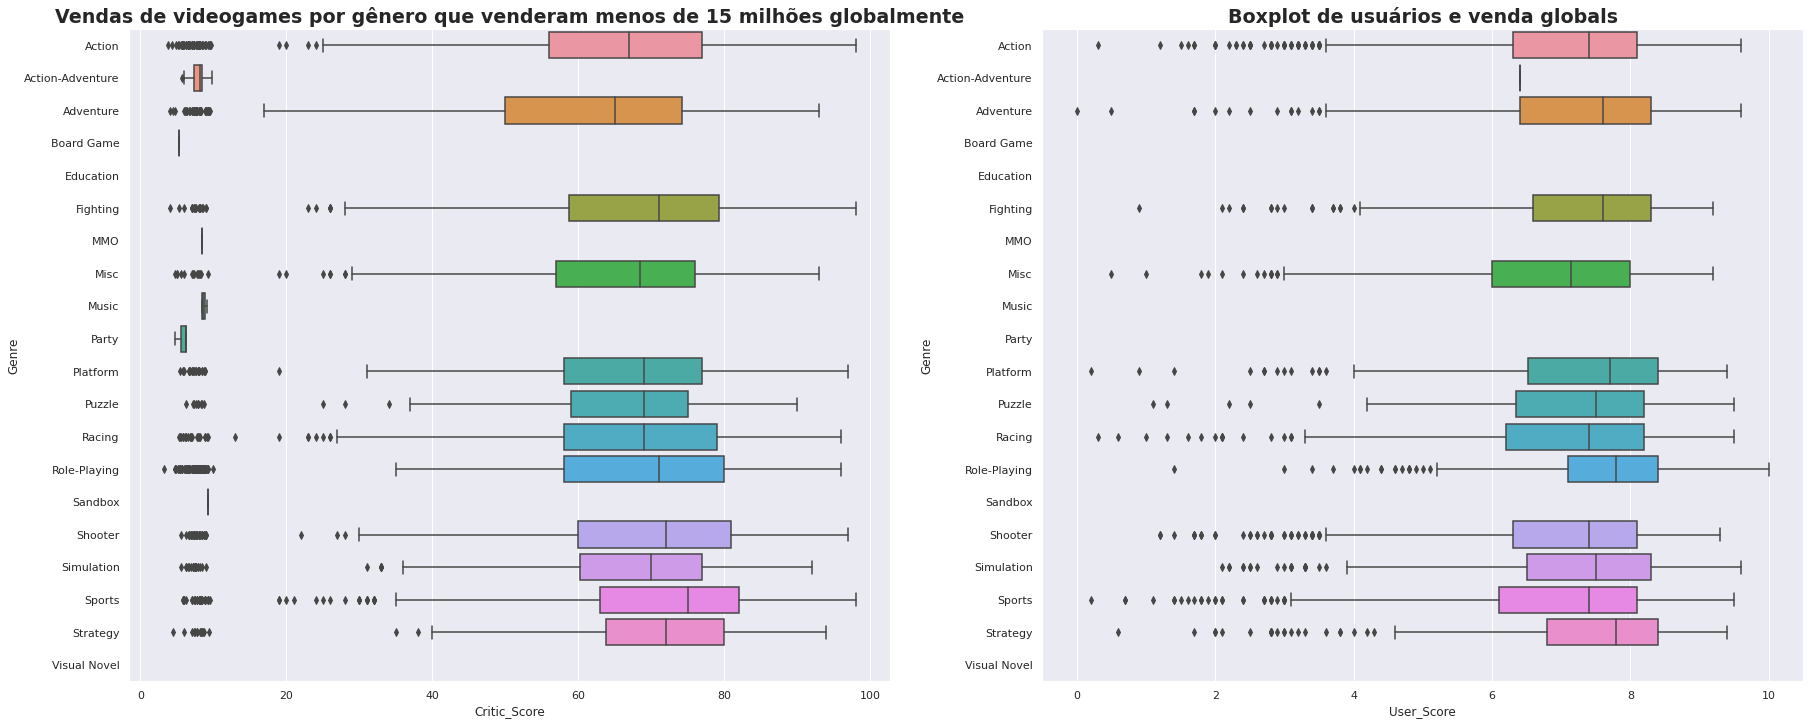

In [ ]:
# GRÁFICO DE DISPERSÃO COMPARANDO AS DUAS CRÍTICAS E AQUI VERIFICAMOS AMBAS CRÍTICAS SE ASEMELHAM PARA VALORES 

fig, axes = plt.subplots(1, 2, figsize=(30,12))

sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y= 'Genre', x= 'Critic_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[0])
axes[0].set_title("Vendas de videogames por gênero que venderam menos de 15 milhões globalmente",fontname="Arial Black",fontweight="bold", size=19)

axes[1].set_title("Boxplot de usuários e venda globals",fontname="Arial Black",fontweight="bold", size=19)
sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y='Genre', x='User_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[1])

There are some general trends that we can see in both critic scores and user scores.

Adventure games tend to receive worse scores for critics, but above average for users.

RPGs tend to get high scores from both audiences (and a notable smaller spread on the IQR).

Sports tend to get slightly lower user scores, but are above average for critics.

With this, we see that in fact some genres are more or less favored for a certain audience of critics, however, the median of both are quite similar.

# GENRE ANALYSIS ?

The interest now arises in knowing not the moment the sale by the games or platform responsible for the launch, but we can graphically infer which genre is most purchased (demanded) by the target audience)

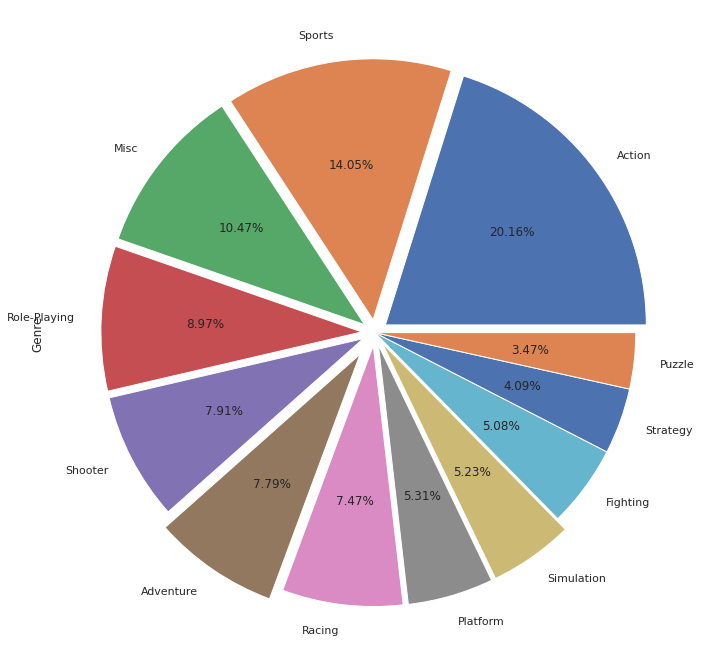

In [ ]:
data.Genre.value_counts().plot.pie(autopct = "%0.2f%%", explode = [0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0,0,0])

Video games in this database are divided into 12 different genres. These general characterizations of each genre are explained below:

* Action - Accuracy and reaction based challenges.
* Adventure - Exploration and a story-driven narrative. Puzzles are also often incorporated.
* Fighting - Combat normally between two players where unique technical inputs are often required.
* Platform - Movement such as jumping and climbing is used to traverse an environment.
* Puzzle - Problem solving and various logic challenges. Often incorporated into other genres.
* Race - Driving some means of transport against others or against time
* Role-playing - Progression-based systems where a player character becomes stronger, often through a story.
* Shooter - Ranged weaponry, most commonly guns, in combat to damage opponents. Opponents can be other players or AI-controlled opponents.
* Simulation - Systems that aim to simulate reality (real or fictitious).
* Sports - Sports recreations, but in a video game.
* Strategy - Gameplay based on skillful and careful planning to achieve a goal.
* Misc - Any game that does not fit into any of the above categories. Notably, music games and party games fall into this category.

In [ ]:
def autolabels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{} Mi'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size = 14,
                fontweight="bold" 
                  )
# ESTA CÉLULA TEM COMO INTUITO CRIAR O DATASET RESPONSÁVEL POR VENDAS GLOBAIS AGRUPADOS POR GÊNERO E ORGANIZA-LOS DE FORMA DESCRESCENTE. 
gblSaleByGenreAll = vgsales[["Genre","Global_Sales"]].groupby(["Genre"]).sum().reset_index()
gblSaleByGenreAll = gblSaleByGenreAll.sort_values(by=["Global_Sales",'Genre'], ascending=False)

# CRIANDO TABELAS DE MÉDIAS DE CRÍTICA POR GENERO
Criticas = vgsales[["Genre","Critic_Score"]].groupby(["Genre"]).mean().reset_index()
User = vgsales[["Genre","User_Score"]].groupby(["Genre"]).mean().reset_index()
vendas_globais = list(gblSaleByGenreAll['Global_Sales'])
labels = list(gblSaleByGenreAll['Genre']) 

criticbygenre = pd.merge(Criticas,User, on = ['Genre'], how = 'inner')
criticbygenre.sort_values(by=['Critic_Score','User_Score','Genre'], ascending = False)

,Genre,Critic_Score,User_Score
17,Sports,61.618041,6.967329
0,Action,56.231600,7.064943
12,Racing,55.293803,7.043653
7,Misc,54.017345,6.823198
16,Simulation,53.429979,7.145559
5,Fighting,53.294555,7.313184
15,Shooter,51.610082,7.039597
10,Platform,46.158226,7.340757
18,Strategy,44.705736,7.305660
13,Role-Playing,44.466692,7.651088


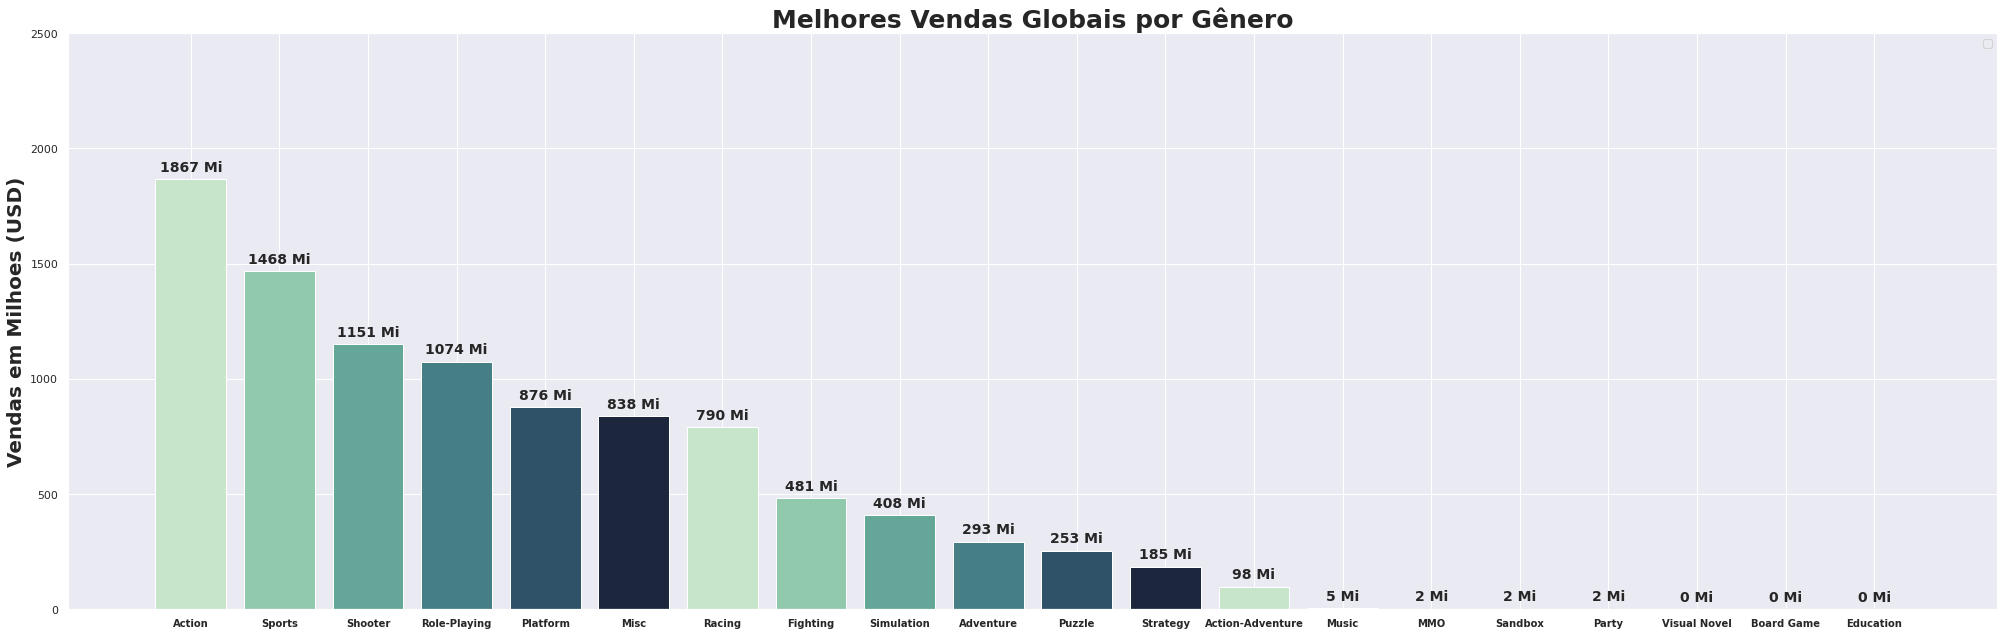

<Figure size 1800x648 with 0 Axes>

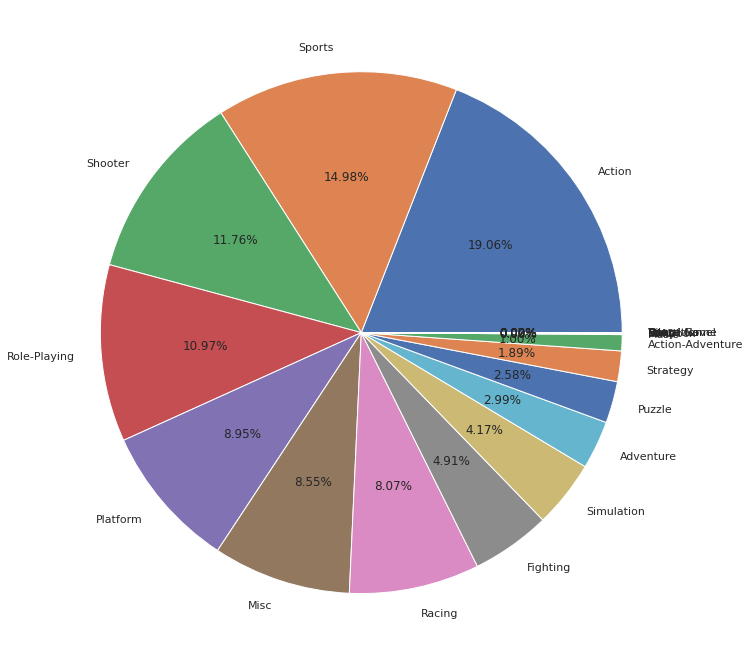

<Figure size 1800x648 with 0 Axes>

In [ ]:
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas_globais :  
  vendas_globais[a] = round(vendas_globais[a])
  a +=1
# POR FIM, COM ESCOPO DE AVALIARMOS GRÁFICAMENTOS,USAMOS A INTESIDADE DE COR PARA MÉTRICA DE MAIOR VALOR DE VENDA DE FORMA DESCRESCENTE
x = np.arange(len(labels))
fig, ax = plt.subplots(1, figsize=(28,9))
width = 0.8
rects1 = ax.bar(x , vendas_globais, width, color = azul )
ax.set_xticks(x)
ax.set_xticklabels(labels,fontweight="bold",size = 10)
ax.set_ylim([0,2500])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
ax.legend()
ax.set_title("Melhores Vendas Globais por Gênero",fontname="Times New Roman",fontweight="bold", size=25)
autolabels(rects1)
fig.tight_layout()
plt.grid(True)
plt.show()

#GRAFICO DE PIZZA 
plt.pie(gblSaleByGenreAll["Global_Sales"], labels =gblSaleByGenreAll["Genre"], autopct = "%0.2f%%")
plt.figure(figsize = (25,9))

So we can see that Action and Sports are the two best selling genres over a period of 30 years and Strategy and Puzzle games are the 2 least selling genres.

Another way to verify these values ​​is through a correlation map where we can subdivide sales by region grouped by Gender.
The scope of this correlation map is to understand which region has the greatest impact on the number of sales in each most requested genre.


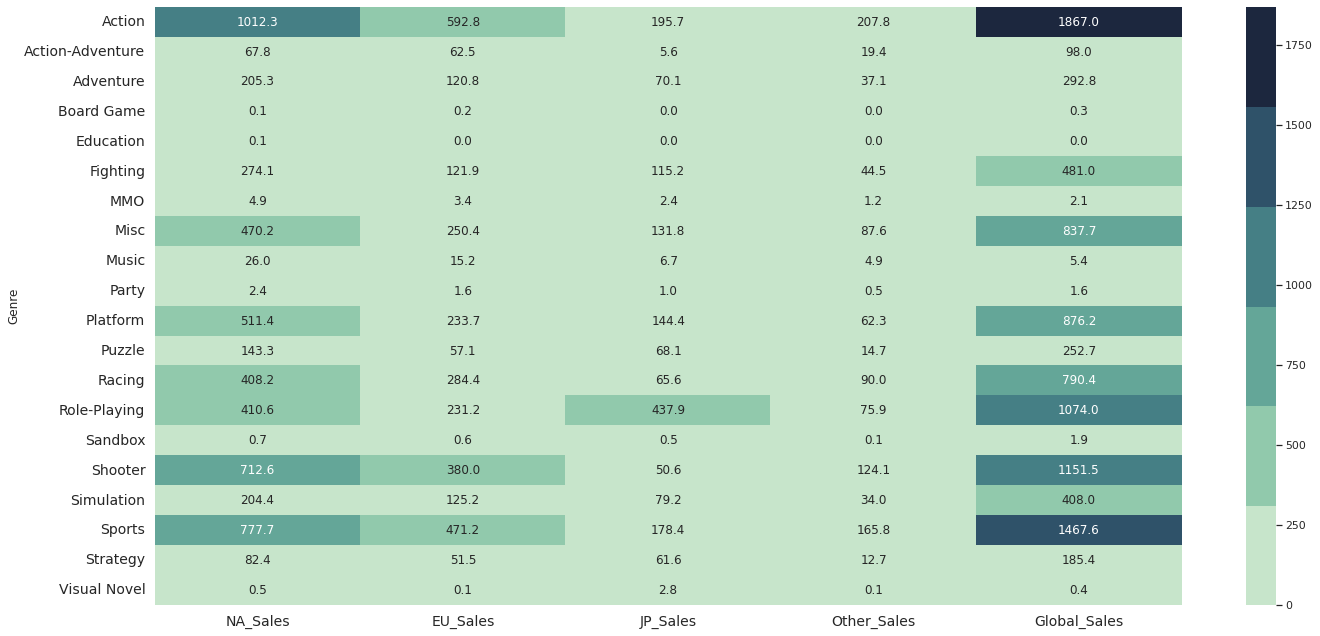

In [ ]:
comp_genre = vgsales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(23, 11))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap = azul )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#PERFIL DE USUÁRIO , COMPRA. VENDA E INTERESSE POR REGIÃO

# DATA SET PLATFORM ANALYSIS


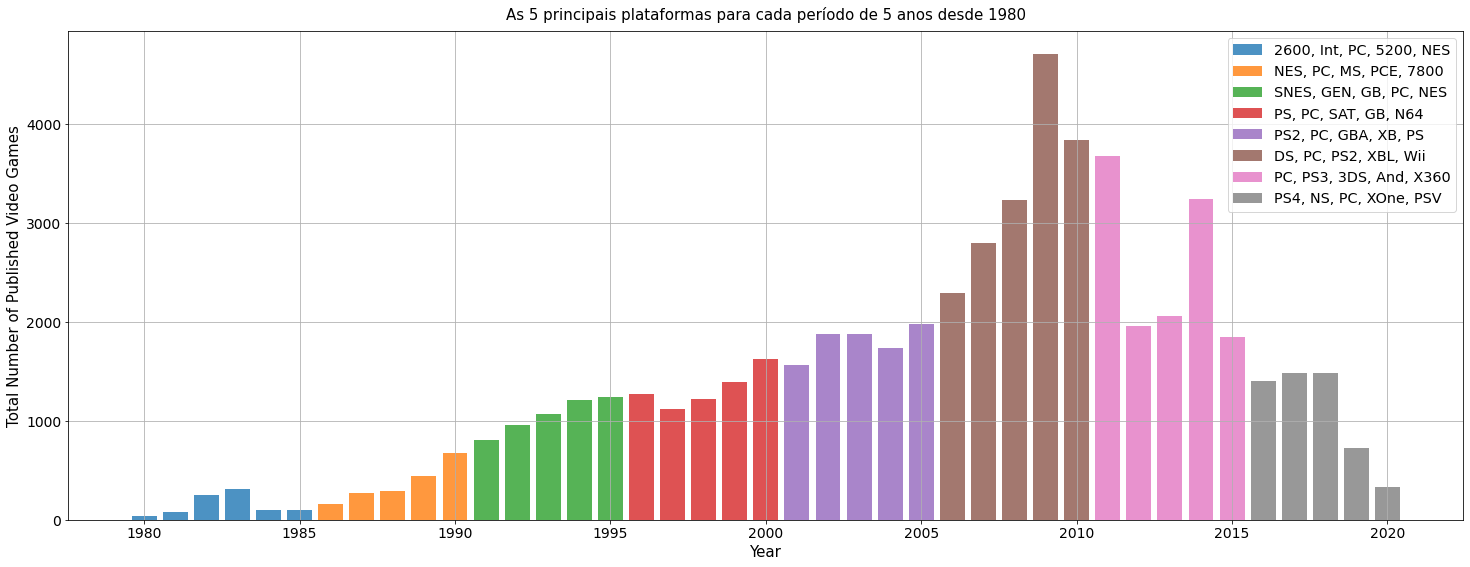

In [16]:
# What are the top 5 platforms for each 5 year time period beginning from 1980 to 2016?

year_sales = vgsales['Year_of_Release'].value_counts()
year_sales = year_sales.sort_index()
# function to get the modal platforms in a given year range
def get_modal_platform(year_range):
    year_range_record = vgsales[vgsales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(25, 9))
start, end = 1980, 1985
for i in range(10):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    bar = ax.bar(year_sales.loc[start:end].index,
           year_sales.loc[start:end].values, 
           label=modal_platform, alpha=0.8)
    start = end + 1
    end = end + 5
      
ax.set_title('As 5 principais plataformas para cada período de 5 anos desde 1980', fontsize=15, y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Number of Published Video Games', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.legend(fontsize='x-large')
plt.grid(True)
plt.show()

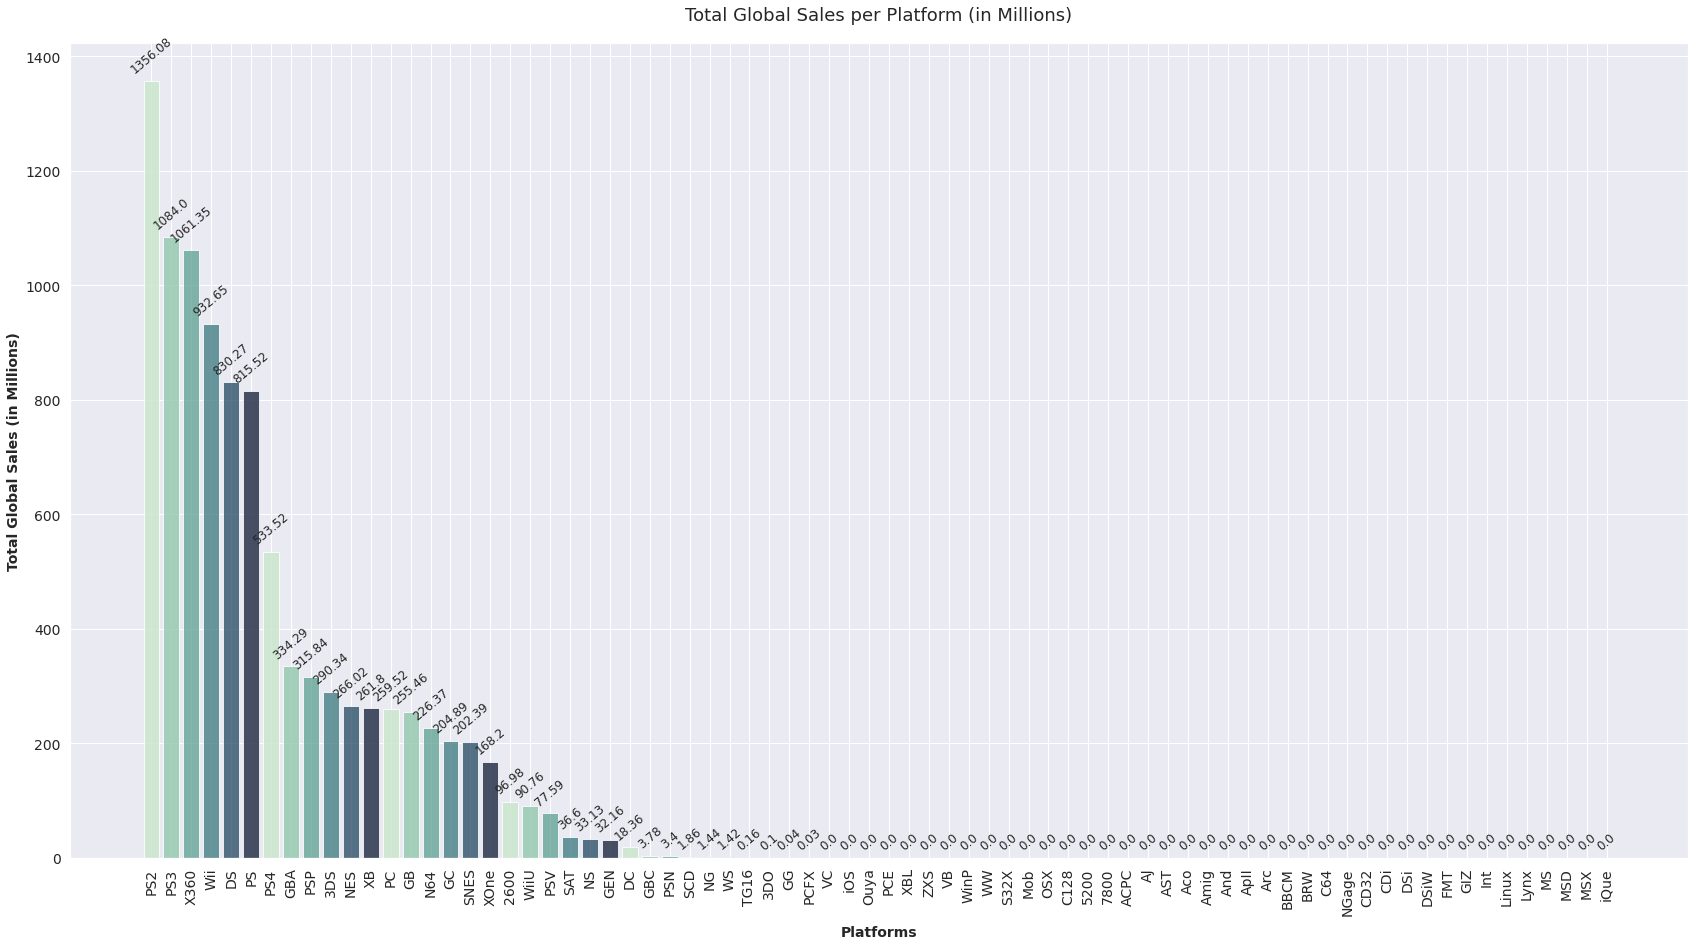

In [ ]:
fig, ax = plt.subplots(figsize=(29, 15))
def add_bar_label(ax, s, yincr=0, xincr=0, isbarh=False, **kwargs):
    if isbarh:
        for i in s.index:
             ax.text(s.loc[i]+xincr, i, round(s.loc[i], 2), 
                     ha='center', **kwargs)
    else:
        for i in s.index:
            ax.text(i, s.loc[i]+yincr, round(s.loc[i], 2), 
                    ha='center', **kwargs)

# Compute for total vg global sales for each platform
platform_global_sales = vgsales.groupby('Platform')['Global_Sales']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
ax.bar(platform_global_sales.index, platform_global_sales.values, color=azul, alpha=0.8)
ax.set_title('Total Global Sales per Platform (in Millions)', fontsize=18, y=1.02)
ax.set_xlabel('Platforms', fontsize=14, labelpad=10, fontweight ='bold')
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14, fontweight = 'bold')
ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14)
add_bar_label(ax, platform_global_sales, 15, fontsize='medium', rotation=40)
fig.subplots_adjust(hspace=0.30)
plt.show()

So we can see that Action and Sports are the two best selling genres over a period of 30 years and Strategy and Puzzle games are the 2 least selling genres.

Another way to verify these values ​​is through a correlation map where we can subdivide sales by region grouped by Gender.
The scope of this correlation map is to understand which region has the greatest impact on the number of sales in each most requested genre.

# INDIVIDUAL GAMES ANALYSIS


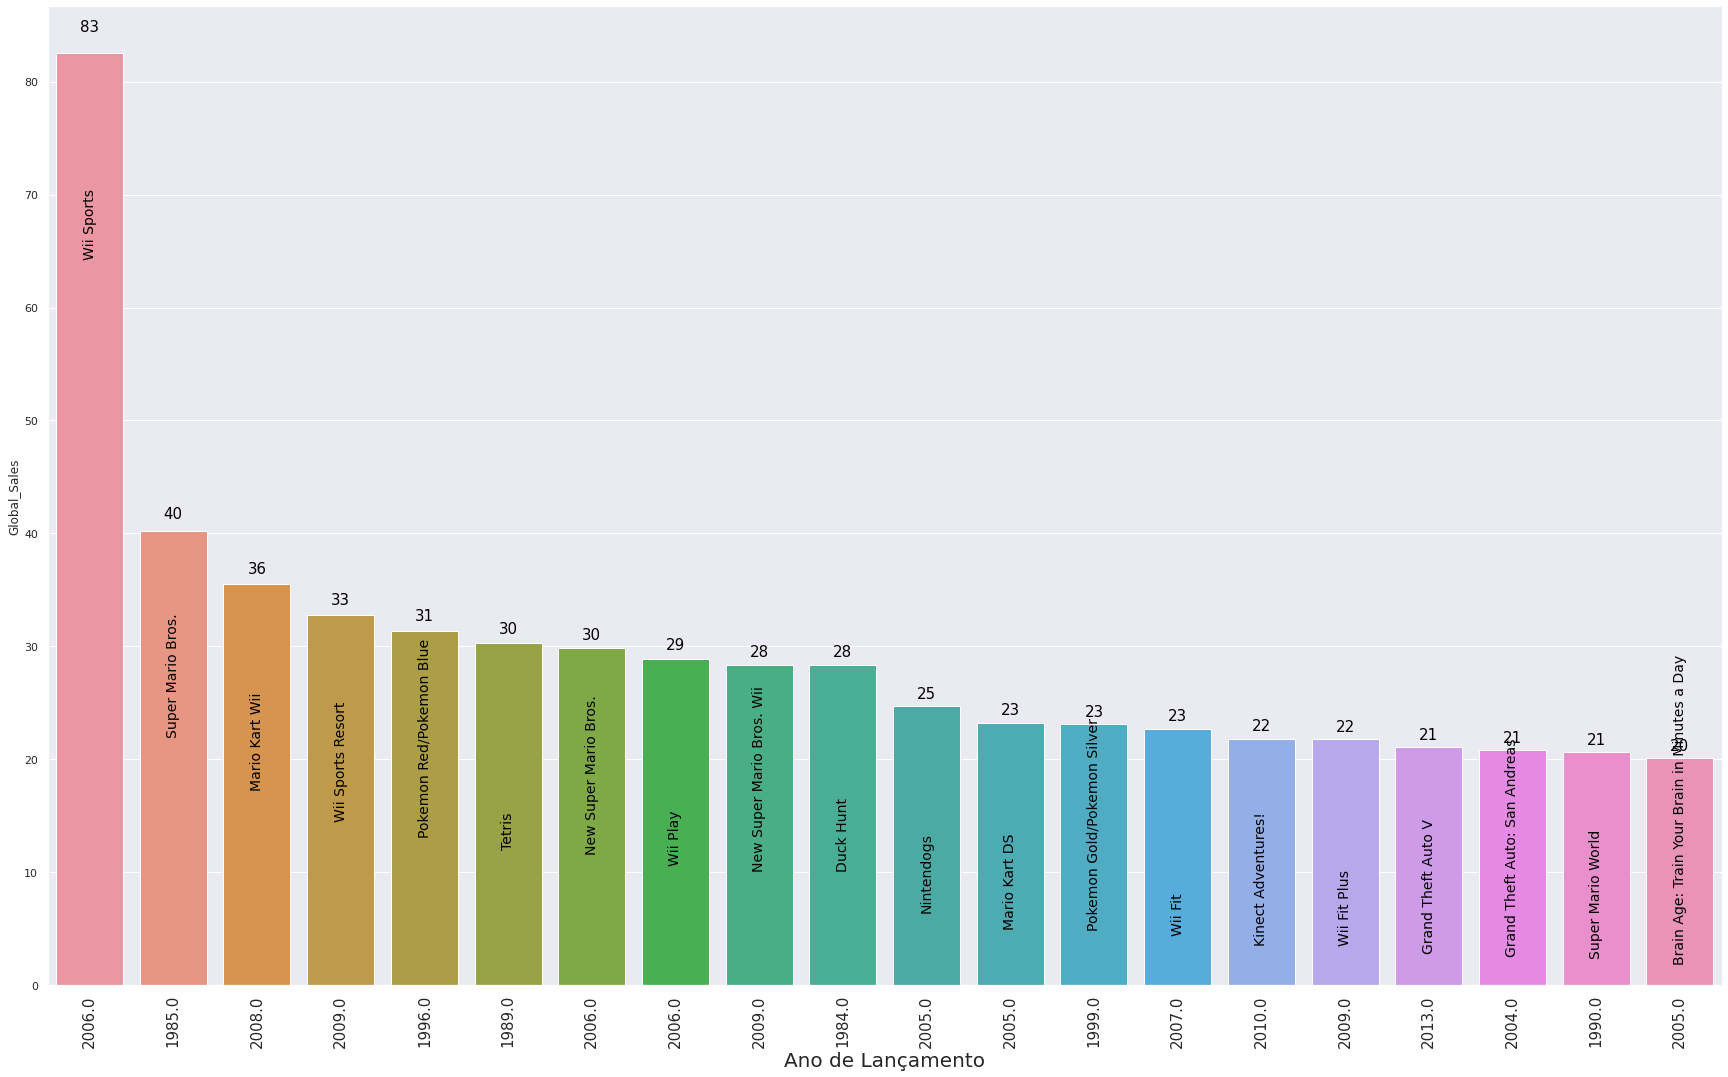

In [ ]:
# FILTRANDOS AS COLUNAS DE INTERESSE

top_game_sale = vgsales.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)


name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)
# PLOTANDOS OS VALORES
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for i in g.patches:
  g.annotate(round(i.get_height()),
                (i.get_x()+ i.get_width()/ 2 ,1.02*i.get_height()),
                ha ='center', va ='baseline', fontsize =15 ,
                color = 'black', xytext=(0,3),
                textcoords ='offset points'
                )
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize= 15, rotation=90)
plt.xlabel('Ano de Lançamento',fontsize = 20)
plt.show()

In [ ]:
vgsales.query('Name == "Wii Sports" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,8.0,322.0,Nintendo,E,82.54


TABELA 
                Genre  Global_Sales
0             Action        130.86
1   Action-Adventure          2.44
2          Adventure         42.43
3          Education          0.00
4           Fighting         53.53
5               Misc        185.15
6              Music          0.00
7              Party          1.61
8           Platform        431.01
9             Puzzle        128.52
10            Racing        152.47
11      Role-Playing        308.46
12           Shooter         69.88
13        Simulation         87.53
14            Sports        219.65
15          Strategy         30.05




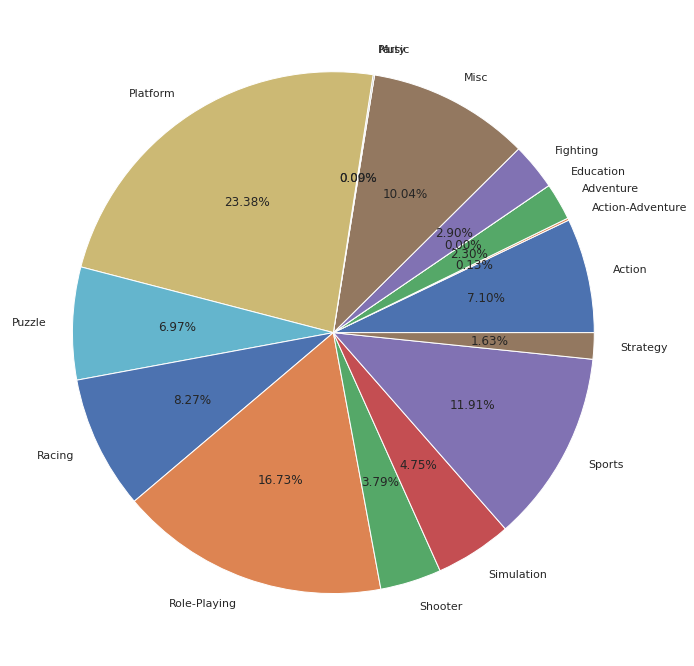

In [ ]:
# FILTRANDO VALORES DA NINTENDO
ninPub = vgsales[vgsales["Publisher"] == "Nintendo"] 

# CRIANDO TABELA 
gblSaleByGenreNin = ninPub[["Genre","Global_Sales"]].groupby(["Genre"]).sum().reset_index()
gblSaleByGenreNin.sort_values(by="Genre", ascending=False)
print ( "TABELA \n", gblSaleByGenreNin )
print("\n")

#PLOTANDO PIZZA DAS VENDAS GLOBAIS AGRUPADOS POR GÊNERO
fig2 = plt.pie(gblSaleByGenreNin["Global_Sales"], labels=gblSaleByGenreNin["Genre"], autopct = "%0.2f%%")


Jogos de Wii Nintendo é o que se caracteriza de maior preço de venda globalmente

# REGION ANALYSIS


In [ ]:
top_sale_reg = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,5316.59
1,EU_Sales,3004.21
2,JP_Sales,1617.64
3,Other_Sales,983.00


### Sales and Popularity by Region and Genre




([<matplotlib.patches.Wedge at 0x7fcf1c60d1d0>,
 [Text(-1.1989688126573843, 0.049737171963656505, 'NA_Sales'),
  Text(0.8097951854505154, -0.8165364398611771, 'EU_Sales'),
  Text(0.9949724181825231, 0.5963471196006755, 'JP_Sales'),
  Text(0.3208619884844171, 1.104331283784819, 'Other_Sales')],
 [Text(-0.6993984740501408, 0.029013350312132962, '48.7%'),
  Text(0.45771032221116087, -0.4615205964432739, '27.5%'),
  Text(0.5661049965521251, 0.339300947359005, '14.8%'),
  Text(0.18135677609988793, 0.6241872473566366, '9.0%')])

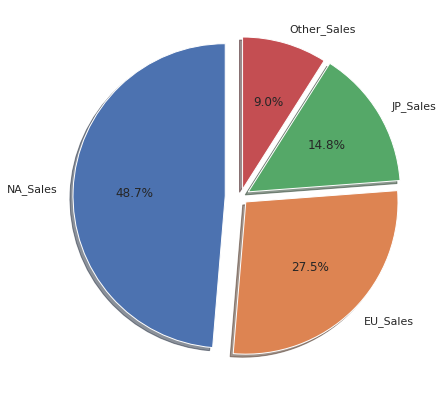

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']


plt.figure(figsize=(25, 7))
explode = [0.1, 0.05 , 0.06, 0.05 ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode =explode , shadow=True, startangle=90)

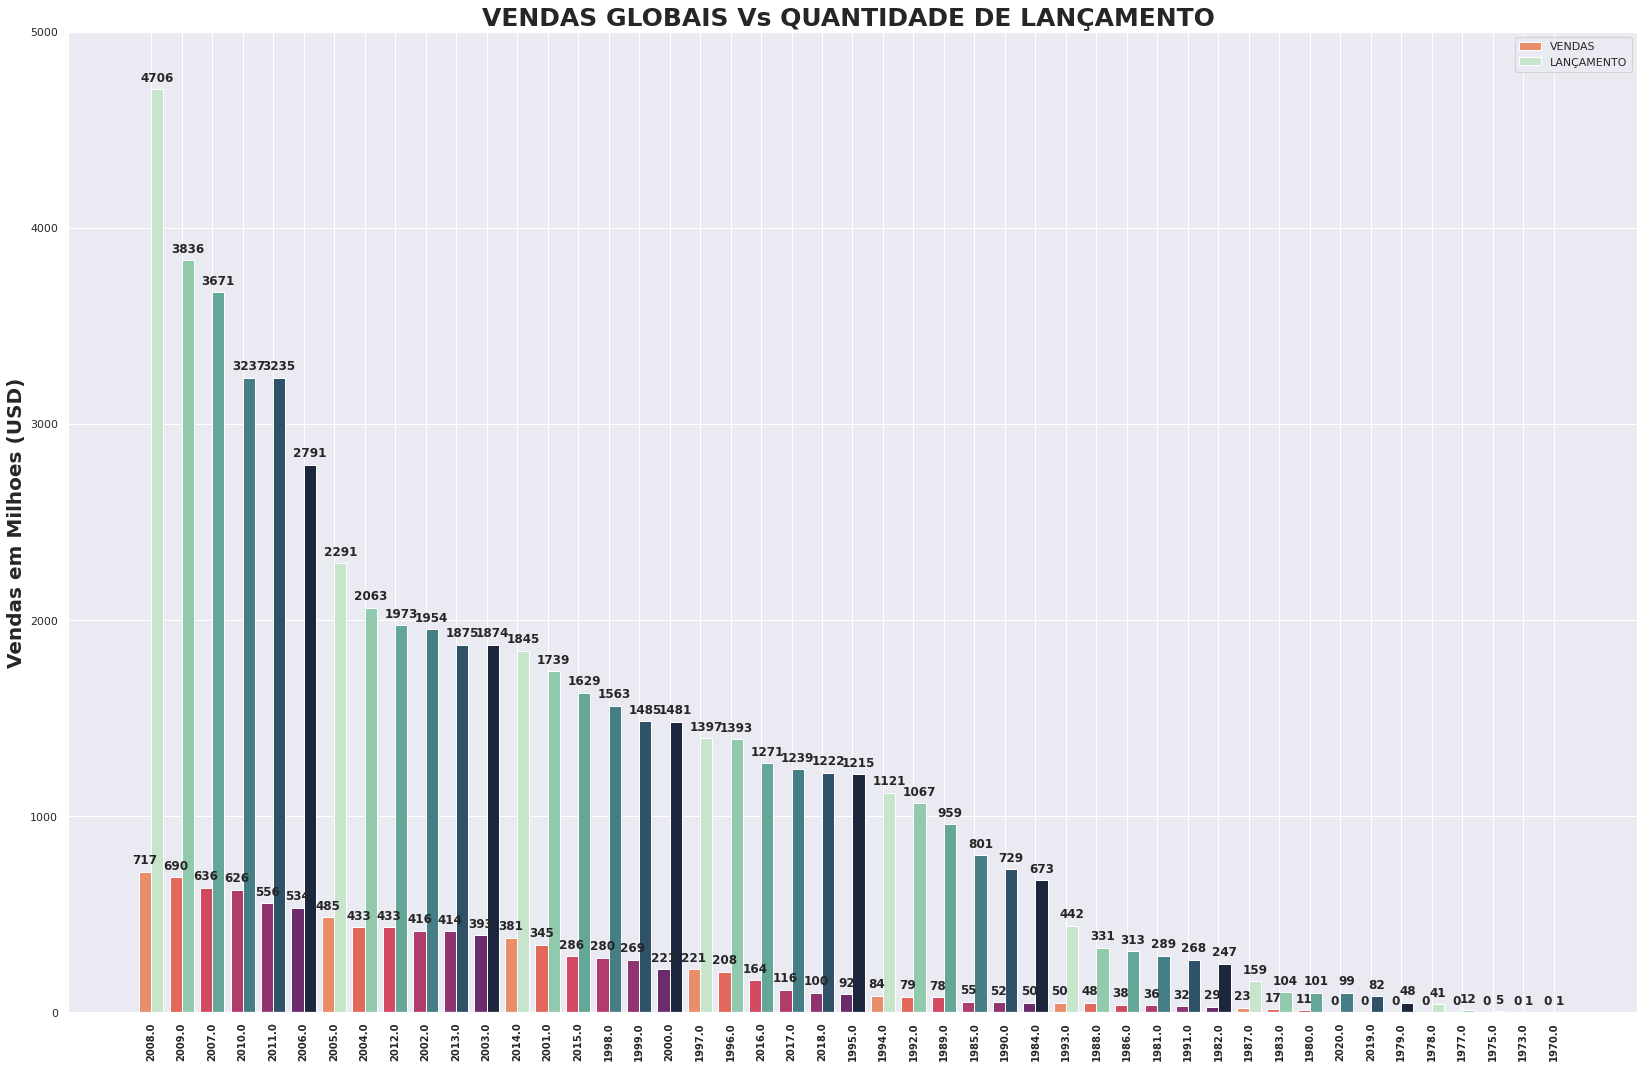

In [ ]:
def labels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{}'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size =12,
                fontweight="bold" 
                  )
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
globalsalesperyear = vgsales[["Year_of_Release","Global_Sales"]].groupby(["Year_of_Release"]).sum().reset_index()
globalsalesperyear = globalsalesperyear.sort_values(by=["Global_Sales",'Year_of_Release'], ascending=False)
anos = list(globalsalesperyear['Year_of_Release'])
vendas = list(globalsalesperyear['Global_Sales'])
x_anos = np.arange(len(anos))
colors = ['darkviolet','blue','mediumblue','mediumturquoise','turquoise','aqua','cyan','aqua','cyan','cyan','cyan','cyan']
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
count_year = vgsales[["Year_of_Release","Name"]].groupby(["Year_of_Release"]).count().reset_index()
count_year = count_year.sort_values(by=["Name",'Year_of_Release'], ascending=False)
release = list(count_year['Name'])
release_year = list(count_year['Year_of_Release'])


# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas :  
  vendas[a] = round(vendas[a])
  a +=1
 # PLOTAGEM DO GRÁFICO , SETANDO INFORMAÇÕES RELEVANTES
fig, ax = plt.subplots(figsize=(23,15))
width = 0.4
paint = ['salmon']
bar1 = ax.bar(x_anos- width/2, vendas, width, color = roxo, label = 'VENDAS')
bar2 = ax.bar(x_anos +width/2, release, width, color = azul,label = 'LANÇAMENTO')
ax.set_xticks(x_anos)
ax.set_xticklabels(anos,fontweight="bold",size = 10)
ax.set_ylim([0,5000])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("VENDAS GLOBAIS Vs QUANTIDADE DE LANÇAMENTO ",fontname="Times New Roman",fontweight="bold", size=25)
labels(bar1)
labels(bar2)

fig.tight_layout()

plt.show()

We note that the years 2008 and 2009 were the years with the highest amount billed for the year when the games were released. In this way, we understand that in relation to the market, this period was the most 'heated' of game entertainment, however the data may be invested due to the number of launches per year, we now verify this proposal:

In the second graph we can already justify why the years 2008 and 2009 have higher global sales. As explained above, these mentioned years were the years with the highest number of launches and, consequently, tend to have higher sales values. We can have a relationship of Amount invoiced in the year by the amount of launch to know in statistical terms, which year was the best.

In [ ]:
TABLE = pd.merge(count_year,globalsalesperyear,on=['Year_of_Release'], how = 'inner')
TABLE = TABLE.rename(columns = {"Name":"Quantidade"})
TABLE['EFICIÊNCIA'] = (TABLE['Global_Sales']/ TABLE['Quantidade'])
TABLE.head(10)

,Year_of_Release,Quantidade,Global_Sales,EFICIÊNCIA
0,2009.0,4706,689.57,0.146530
1,2010.0,3836,626.07,0.163209
2,2011.0,3671,555.54,0.151332
3,2014.0,3237,381.38,0.117819
4,2008.0,3235,717.20,0.221700
5,2007.0,2791,636.29,0.227979
6,2006.0,2291,534.01,0.233090
7,2013.0,2063,413.74,0.200553
8,2005.0,1973,485.03,0.245834
9,2012.0,1954,432.86,0.221525


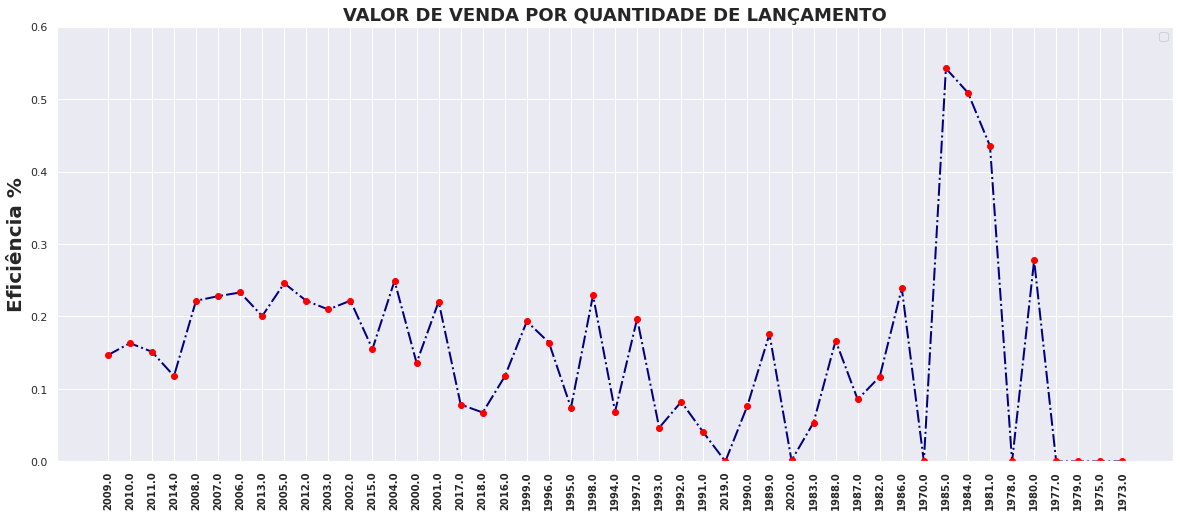

In [ ]:
eficiencia = list(TABLE['EFICIÊNCIA'])
released = list(TABLE['Year_of_Release'])
glsales = list(TABLE['Global_Sales'])
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in glsales :
  glsales[a] = round(glsales[a])
  a +=1
  #PLOTANDO OS VALORES
fig, ax = plt.subplots(figsize=(20,8))
released_anos = np.arange(len(released))
line = ax.plot(released_anos,eficiencia, 
               color = 'navy',
               linewidth = 2,
               linestyle = 'dashdot',
               marker = 'o',
               markersize = 6 ,
               mfc ='red',
               mec ='red'
               )

ax.set_xticks(released_anos)
ax.set_xticklabels(released,fontweight="bold",size = 10)
ax.set_ylim([0,0.6])
plt.ylabel('Eficiência %',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("VALOR DE VENDA POR QUANTIDADE DE LANÇAMENTO",fontname="Times New Roman",fontweight="bold", size=18)
#for (i ,valor) in enumerate(eficiencia, start = 0):
  #plt.text(x=released_anos[i],
           #y = valor + 3,
           #s = f'{valor}',
           #ha ='right'
           #)
plt.show()

# INDICATIVE RATING ANALYSIS


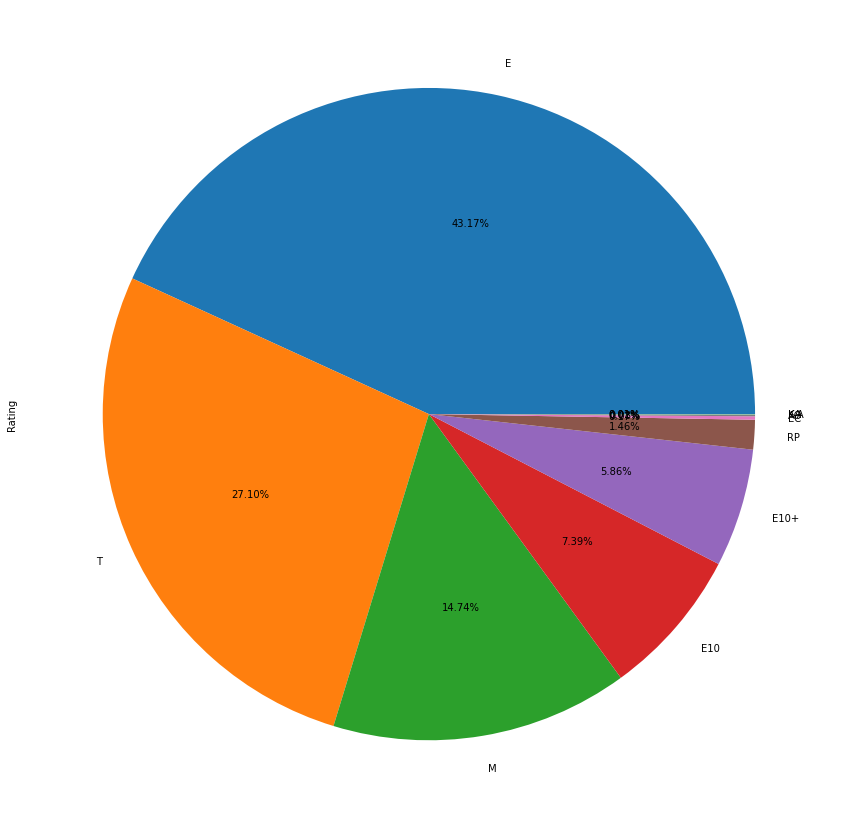

In [19]:
plt.figure(figsize=(15,15))
vgsales.Rating.value_counts().plot.pie(autopct = "%0.2f%%")

A brief explanation taken from the ESRB website for each rating:

Per the official ESRB Rating - https://www.esrb.org/ratings-guide/, its glossary follows;

* E =>( Everyone) General content for all ages, containing minimal fantasy, violence or animation in cartoons.

* E10 => Content more suitable for people over 10 years old, may contain fantasy, violence or more frequent animations me cartons of minimum intensity

* T => ( Teens ) Content best suited for over 13, may contain fantasy, humor, gore and frequent use of linguistic expressions.

* M => ( Mature ) Content best suited for over 17s and may contain intense violence , gore and inappropriate use of linguistic expressions .

* A => (Adults only) Content suitable for adults over 18 and may contain prolonged scenes of violence, gambling, blood and expressively sexualized scenes.

* RP => ( Rating Pending ) Rating still pending.

Some less common ones are explained below:

* EC - Early Childhood. Content generally suitable for ages 3+. Does not contain material that parents deem inappropriate.
* K-A - Children to Adults. The previous name of the rating category * * 'E' to 'All'.
* RP - Pending rating. The game has yet to receive a final rating. Replaced once rating is assigned
K-A was renamed to E in 1998. EC was also discontinued in 2018 due to lack of usage, as E was also applicable to titles rated EC. So for our exploration and analysis, we will be labeling these games to be rated E to be consistent with modern ratings.
We also note that game ratings were only introduced in 1994, so many games before that era may not have a rating.


In [ ]:
vgsales.replace(['K-A', 'EC'], 'E', True)
vgsales.replace(['E10+'], 'E10', True)
vgsales.Rating.value_counts()

E      10507
T       6569
M       3572
E10     3210
RP       355
AO        20
KA         3
Name: Rating, dtype: int64

As for RP games, we will manually discover these ratings and correct them ourselves.


In [ ]:
vgsales.loc[vgsales.Rating == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
13673,Clockwork Empires,PC,NaN,Strategy,Unknown,0.0,0.04,0.00,0.00,58.0,3.8,5.0,Gaslamp Games,RP,0.04
14272,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.00,0.01,63.0,6.8,27.0,BattleGoat Studios,RP,0.04
16182,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0.0,0.01,0.00,0.00,65.0,NaN,NaN,Black Bean Games,RP,0.01
19147,Hollow Knight,PC,2017.0,Action-Adventure,Team Cherry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Cherry,RP,NaN
19658,Final Fantasy Type-0,PSP,2020.0,Role-Playing,Unknown,NaN,NaN,0.81,NaN,NaN,NaN,NaN,Square Enix,RP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72430,Wreckfest,PS4,2019.0,Racing,THQ Nordic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bugbear Entertainment,RP,NaN
72431,Wreckfest,PC,2018.0,Racing,THQ Nordic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bugbear Entertainment,RP,NaN
72503,Lost Ember,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Lost Ember,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


Existe diversos jogos com a classificação Adults Only em nosso banco de dados, 

In [ ]:
vgsales.loc[vgsales.Rating == "AO"]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,93.0,8.6,118.0,Rockstar North,AO,1.96
38454,Absolute Obedience,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
42768,Cat Girl Alliance,PC,2008.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sekilala,AO,NaN
44025,Critical Point,PC,2002.0,Adventure,Peach Princess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sweet Basil,AO,NaN
44128,Crystal Fantasy,PC,2009.0,Misc,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,AO,NaN
46656,Enzai - Falsely Accused - eine falsche Beschul...,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
51057,ioi,PC,2008.0,Misc,Westwood Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Well, let us see...",AO,NaN
51058,ioi 2: The Return of ioi,PC,1999.0,Role-Playing,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stellar Stone LLC,AO,NaN
51802,Kana Little Sister,PC,2002.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D.O.,AO,NaN
53691,Manhunt 2,PC,2009.0,Action,Rockstar Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rockstar London,AO,NaN


In [ ]:
data.loc[data.Name == 'Grand Theft Auto: San Andreas']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,95.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,93.0,8.6,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,93.0,8.9,1841.0,Rockstar North,M
10312,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.02,0.00,0.01,NaN,7.5,46.0,War Drum Studios,M


We can see how E is the most common classification followed closely with T.
#$ How does Rank affect sales?


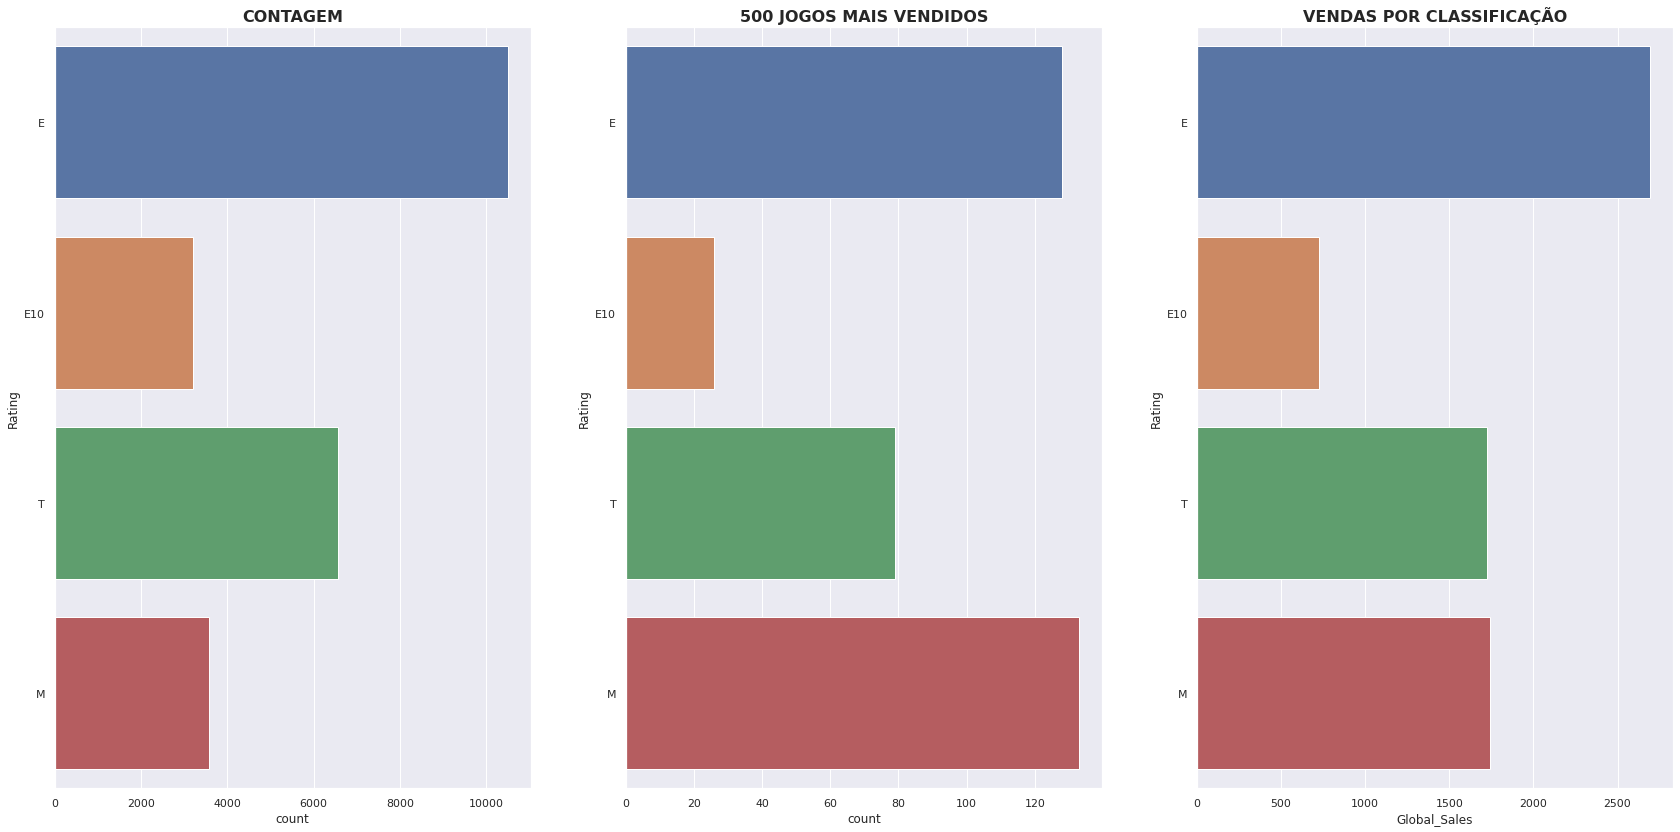

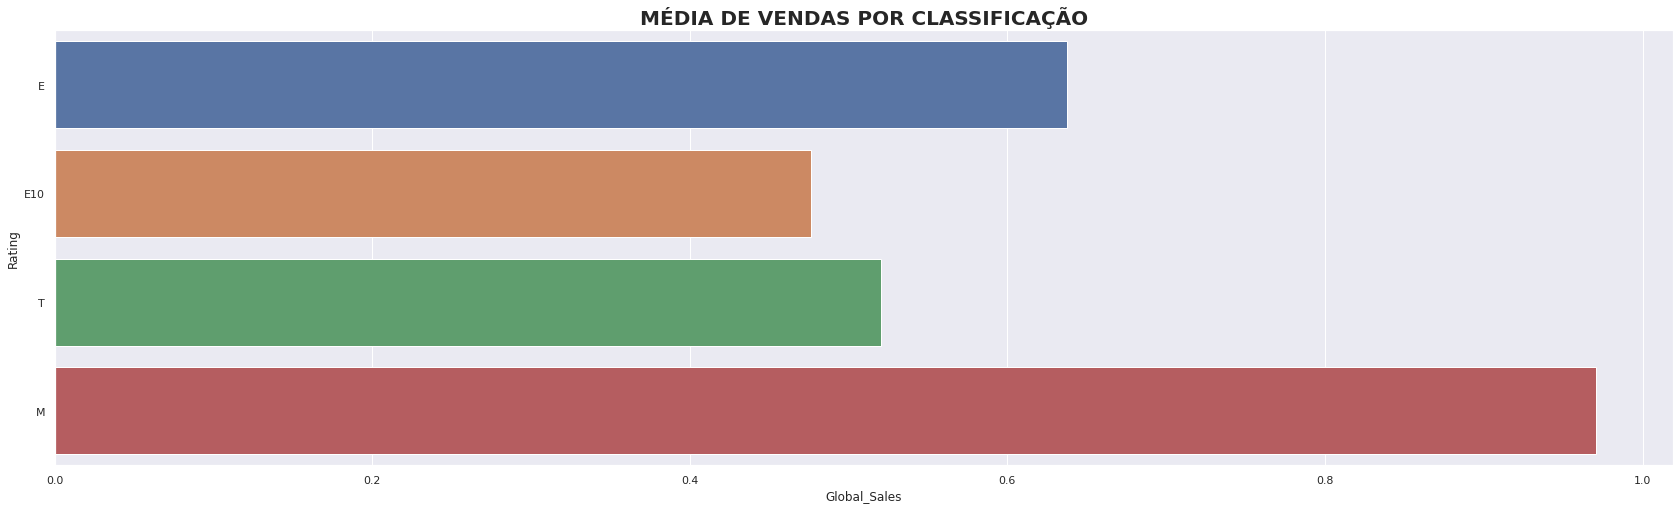

In [ ]:
rating_order = ['E', 'E10', 'T', 'M',] #ORGANIZANDO NOSSOS DADOS
plt.figure(1, figsize = [29,14]) # TAMANHO DO PLOT GERAL
plt.subplot(1,3,1) #SUBDIVIDINDO NOSSO PLOT EM 3 GRÁFICOS

# CONTAGEM DE CADA CLASSIFICAÇÃO
plt.title("CONTAGEM",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales, y='Rating', order=rating_order)

#CONTAGEM DE CADA CLASSIFICAÇÃO DAS 500 VENDAS MAIS CARAS
plt.subplot(1,3,2)
plt.title("500 JOGOS MAIS VENDIDOS",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales.sort_values('Global_Sales', ascending=False)[:500], y='Rating', order=rating_order)

# VENDAS GLOBAIS POR CLASSIFICAÇÃO
plt.subplot(1,3,3)
plt.title("VENDAS POR CLASSIFICAÇÃO", size = 16, fontweight = 'bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).sum(), x='Global_Sales', y='Rating', order=rating_order)

# MÉDIA DAS VENDAS GLOBAIS POR CLASSIFICAÇÃO 

plt.figure(figsize=(29,8))
plt.title("MÉDIA DE VENDAS POR CLASSIFICAÇÃO", size = 20, fontweight='bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).mean(), x='Global_Sales', y='Rating', order=rating_order)

Adult rated games have a much higher average value for Global Sales than all other ratings.

Do ratings perform better or worse on certain consoles

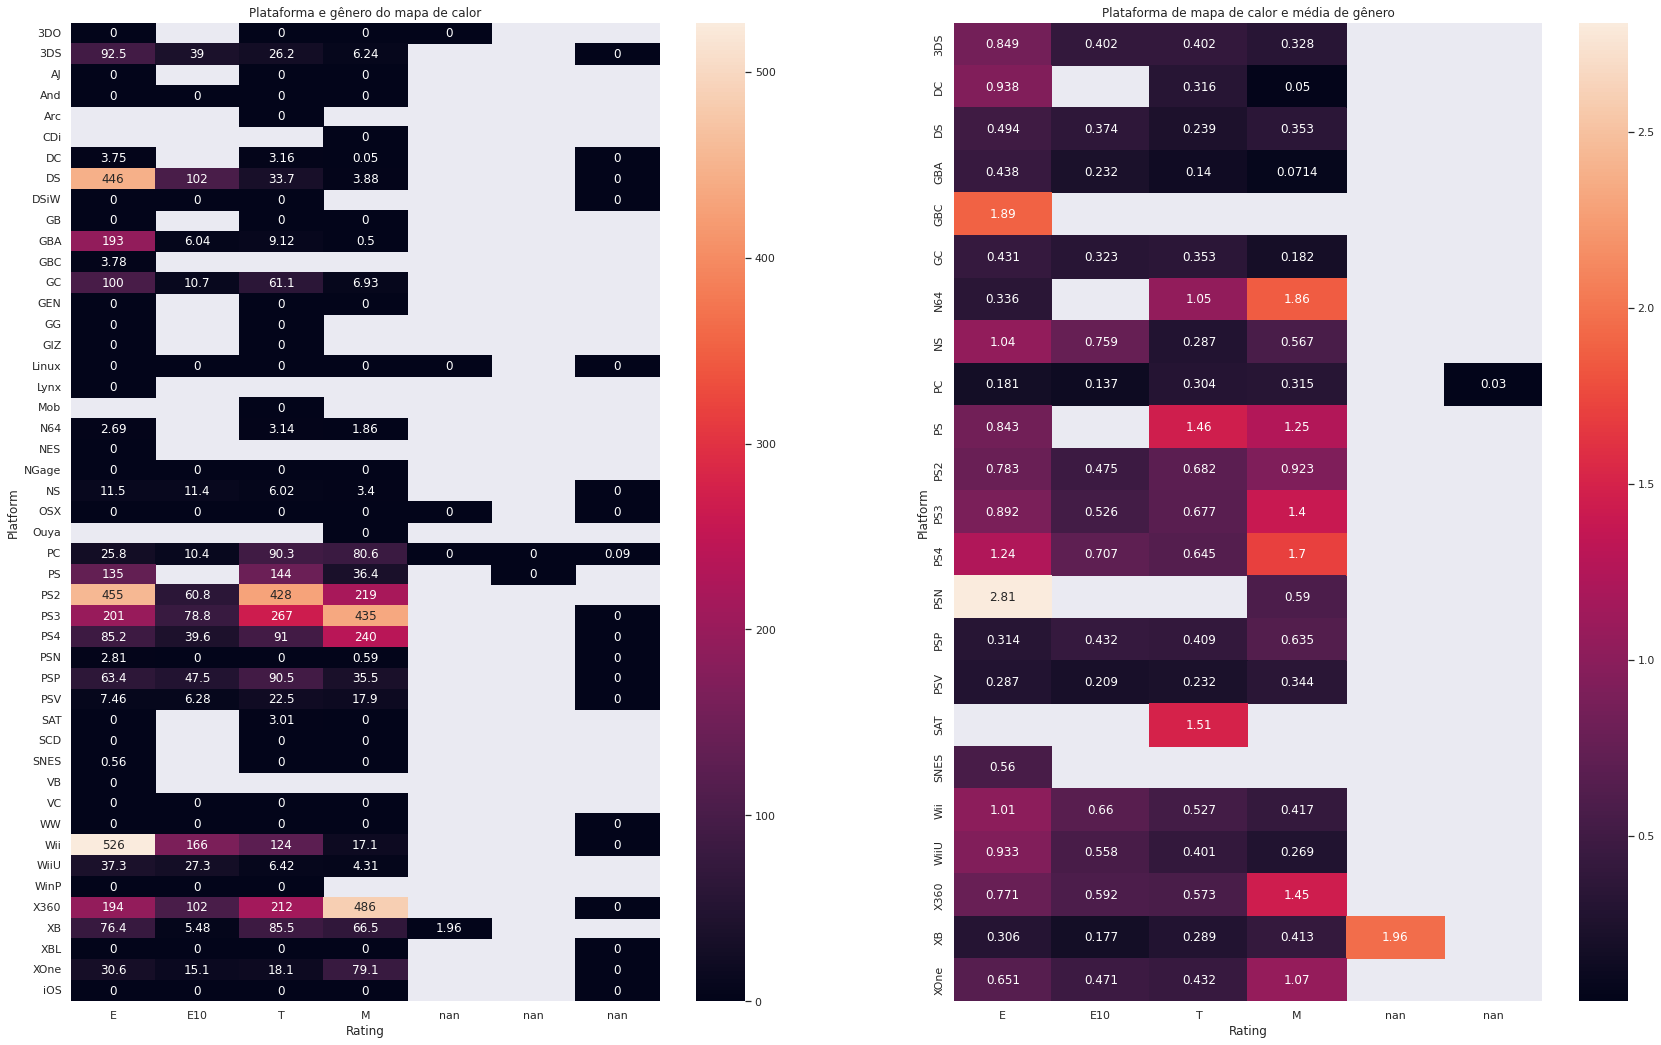

In [ ]:
# Create a pivot table, we will drop platforms without sales data in 3 or less genres

global_sales_rating_platform = vgsales.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.sum)
global_sales_mean_rating_platform = vgsales.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.mean)

global_sales_rating_platform.index = pd.CategoricalIndex(global_sales_rating_platform.index, categories=rating_order)
global_sales_rating_platform.sort_index(level=0, inplace=True)

global_sales_mean_rating_platform.index = pd.CategoricalIndex(global_sales_mean_rating_platform.index, categories=rating_order)
global_sales_mean_rating_platform.sort_index(level=0, inplace=True)

# Heat map of genres & platform
fig, axes_rating_platform_heatmap = plt.subplots(1, 2, figsize=(29,18))

axes_rating_platform_heatmap[0].set_title("Plataforma e gênero do mapa de calor")
sns.heatmap(data=global_sales_rating_platform.transpose(), ax=axes_rating_platform_heatmap[0], annot=True, fmt=".3g")

axes_rating_platform_heatmap[1].set_title("Plataforma de mapa de calor e média de gênero")
sns.heatmap(data=global_sales_mean_rating_platform.transpose(), ax=axes_rating_platform_heatmap[1], annot=True, fmt=".3g")

Some clear patterns can be seen.

Mature games sell better on Playstation consoles and also fairly well on Xbox consoles. They notably perform very poorly on most other consoles (with PC being the exception).

Teenage games follow a similar trend to adult games, but to a lesser extent. Sales in the teen rating are much closer, with fewer consoles at the extremes, but they still tend to sell a little better on Playstation consoles.

Games rated E and E10+ sell reasonably on most consoles, though they seem by far the best on Nintendo's consoles, notably the Wii and DS. They also sell very well on Playstation consoles. The PC notably doesn't sell E-rated games as well as any other console, especially when compared to the average global sales metric.

These are in line with the general market these platforms tend to be for. Sony and Microsoft tend to market the Playstation and Xbox line of consoles to older audiences, while Nintendo tends to market its consoles to have much broader appeal.

In addition to sales, let's look at the relationship between genres and rating.

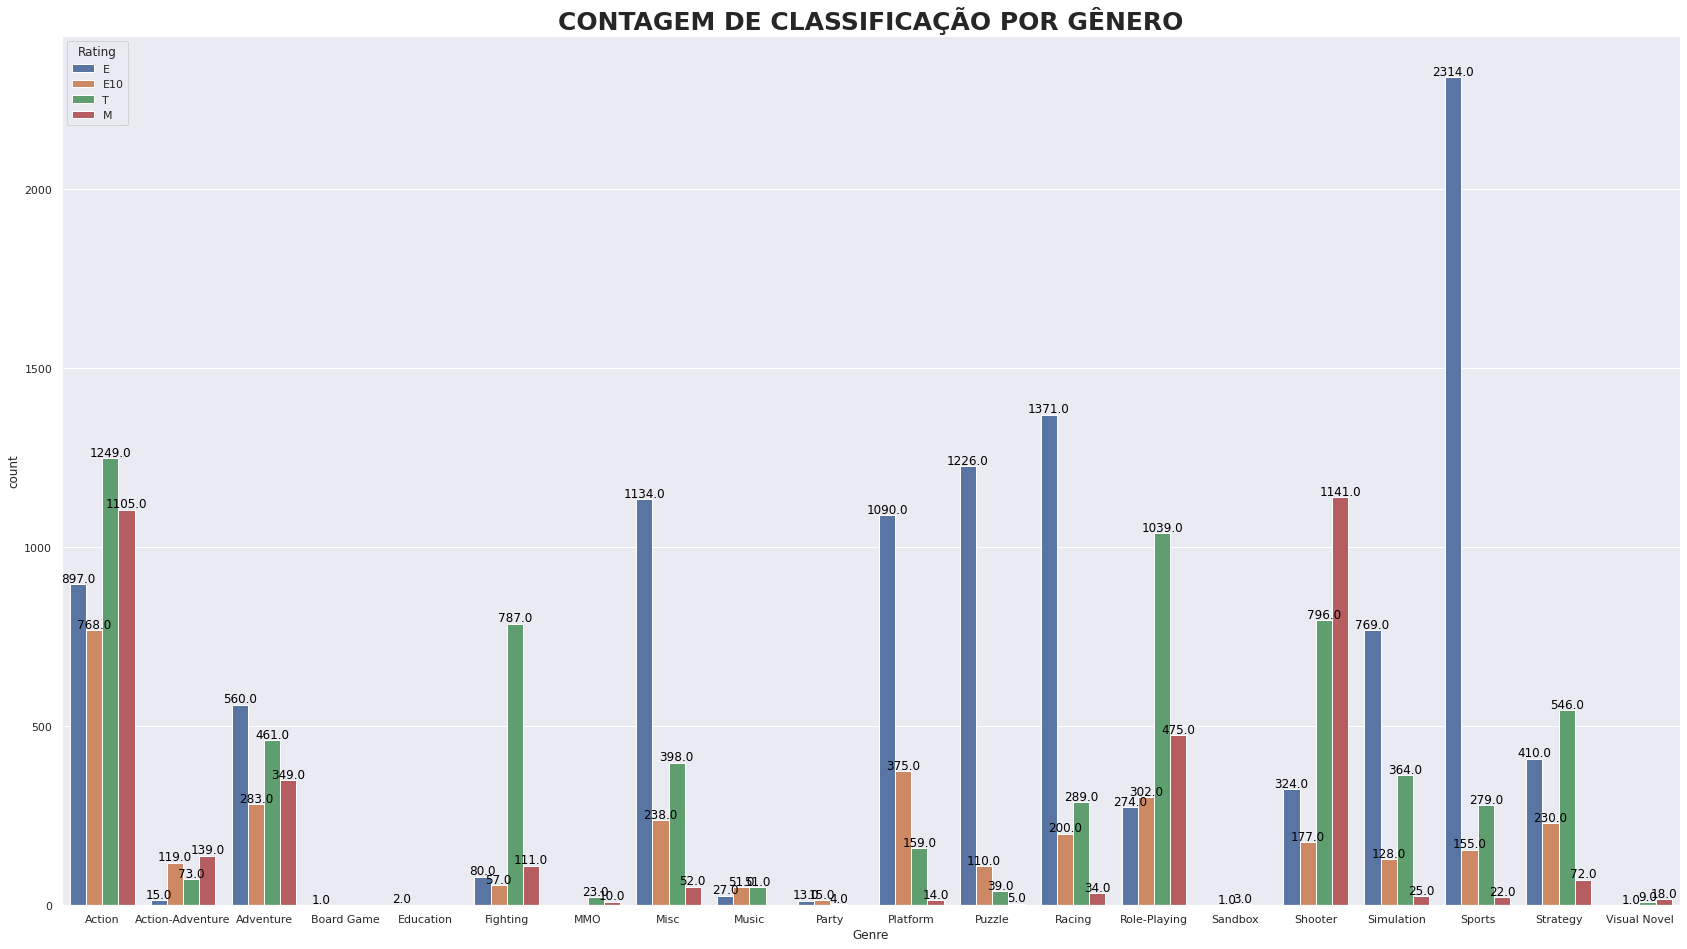

In [ ]:
# Count plot of genre and rating.

plt.figure(figsize=(29,16))
plt.title("CONTAGEM DE CLASSIFICAÇÃO POR GÊNERO", size = 25, fontweight ='bold')
plot = sns.countplot(data=vgsales, x='Genre', hue='Rating', order=sorted(vgsales.Genre.dropna().unique()), hue_order=rating_order)
for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x()+ i.get_width()/ 2 ,i.get_height()),
                ha ='center', va ='baseline', fontsize =12 ,
                color = 'black', xytext=(0,2),
                textcoords ='offset points'
                )


There are clear correlations for games of a specific genre to receive a rating.

Adventure games are quite representative.

Platforms, puzzles, racing, simulation, sports and miscellaneous games have strong tendencies towards E-rated games.

Fighting, RPG and strategy games are heavily biased towards T ratings.

The stock is slightly biased towards the T and M ratings, but is fairly balanced.

Shooters are the only genre heavily biased towards mature ratings. This makes sense given the tendency to include violent themes.

# DEVELOPER AND SALES ANALYSIS


In [ ]:
vgsales.Developer.value_counts()

Unknown                 4571
Konami                   790
Sega                     754
Capcom                   641
Namco                    399
                        ... 
8MonkeyLabs                1
Palestar                   1
Dome Software              1
Silent Grove Studios       1
Outerloop Games            1
Name: Developer, Length: 8198, dtype: int64

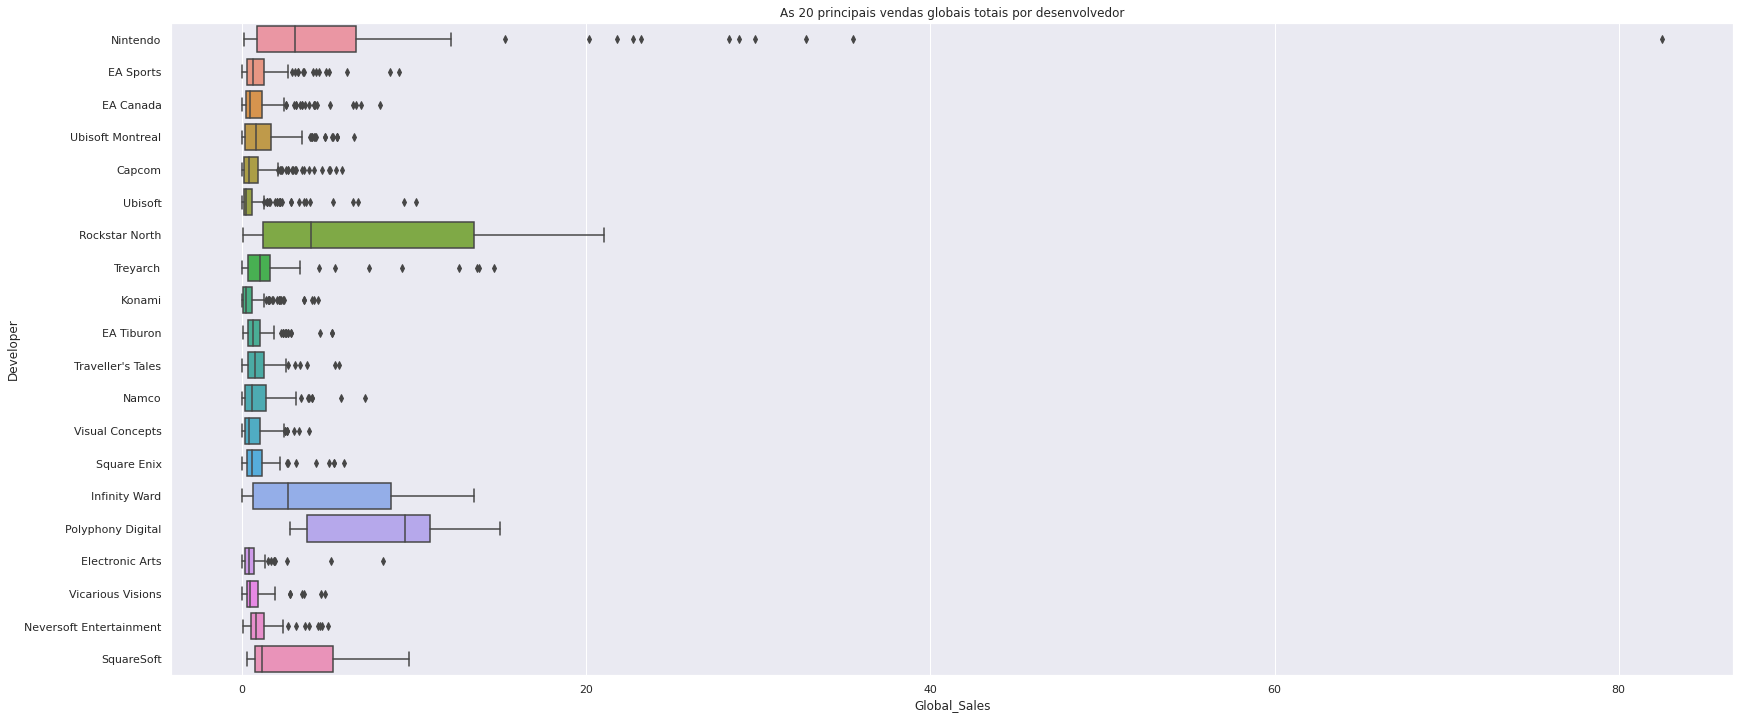

In [ ]:
plt.figure(figsize=(28,12))
plt.title("As 20 principais vendas globais totais por desenvolvedor")
sns.boxplot(data=vgsales[vgsales['Developer'].isin(top_developers_data['Developer'].values)] , x='Global_Sales', y='Developer', order=top_developers_data['Developer'])

Nintendo has considerably higher global sales than any other company. Part of this is due to the fact that other companies have multiple teams of developers with different names. For example, Electronic Arts has many subsidiaries that can be seen with EA in the title.

If we consider the sum of all EA developers, we find that they actually have higher total sales than Nintendo.

In [ ]:
vgsales.dropna().loc[vgsales.Developer.str.contains(r"\b(?:EA|Electronic Arts)\b",case=False , regex=True).dropna()].Global_Sales.sum()

590.39

In [ ]:
vgsales.dropna().loc[vgsales.Developer.str.contains(r"\b(?:Nintendo)\b",case=False , regex=True).dropna()].Global_Sales.sum()

551.61

We can see that the sum total of all global sales from any developer with EA or Electronic Arts to their name is $590.33 million compared to Nintendo's $551.57 million.

## Which developers consistently make the best selling games?


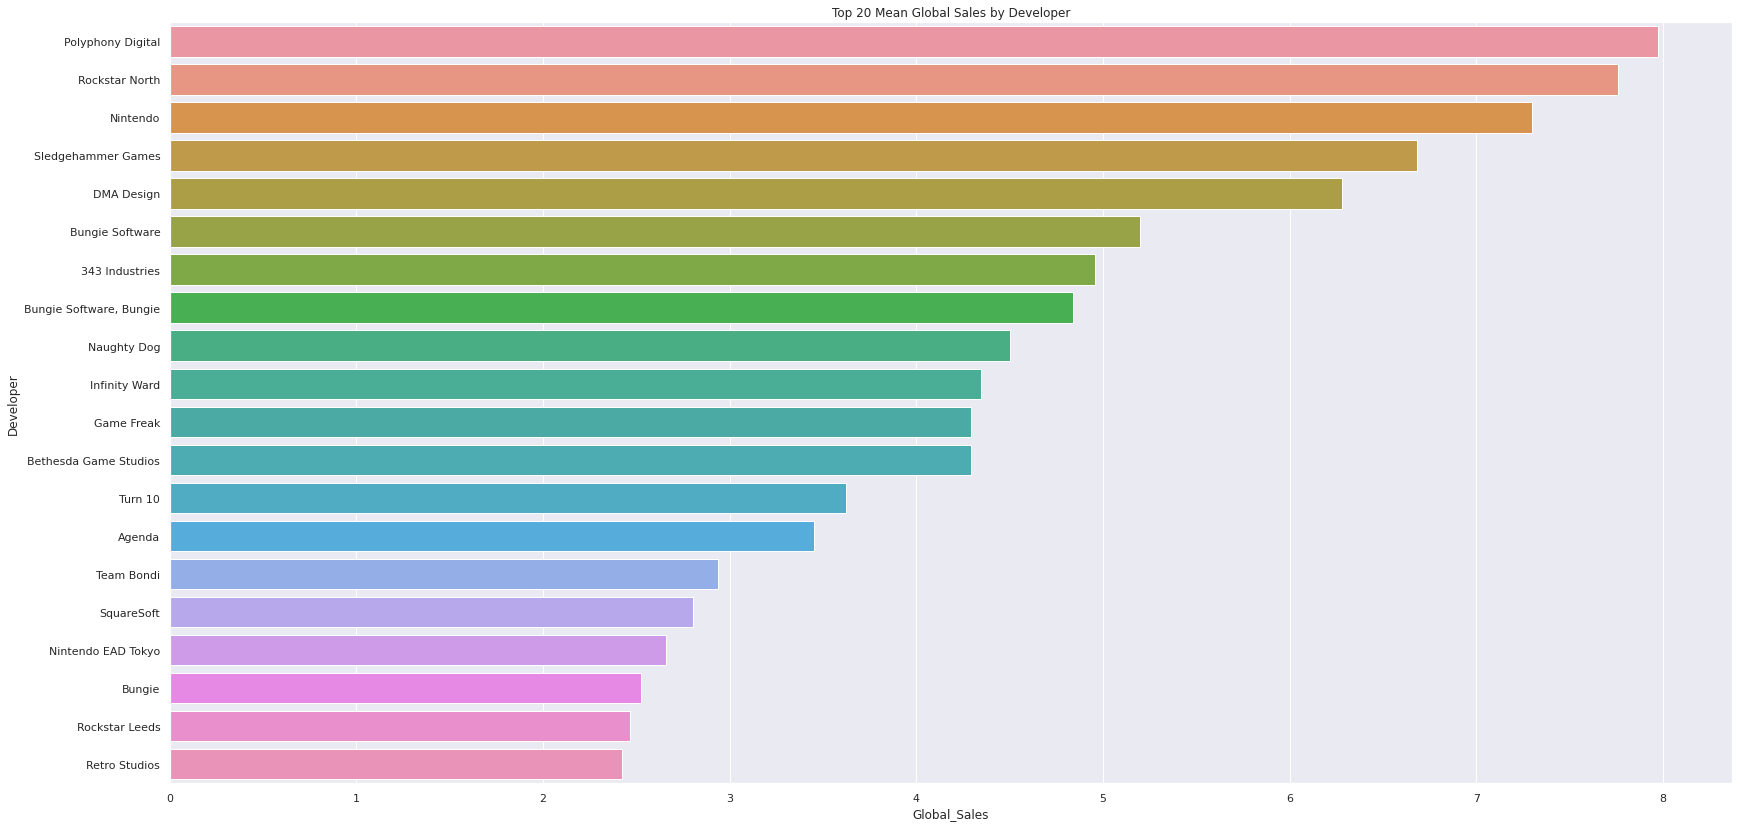

In [ ]:
vg_developer_counts = vgsales.Developer.value_counts()
frequent_developers_data = vgsales.loc[vgsales.Developer.isin(vg_developer_counts.index[vg_developer_counts.gt(5)])]

plt.figure(figsize=(28,14))
plt.title("Top 20 Mean Global Sales by Developer")
sns.barplot(data=frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20] , x='Global_Sales', y='Developer')

We added in the clause when looking at average global sales per developer that they must have at least 5 games in their database. This allows us to see developers who can consistently create the best-selling games, rather than those who created a game that sold well.

Polyphony Digital, Rockstar North and Nintendo are at the top by a considerable margin.

A possible reason could be that the developers at the top of the list created popular series. So if a video game in the series has sold well, it stands to reason that other video games, often sequels, will also sell well.

We can see from the top six developers, they all have one or more popular series:

Polyphony Digital created the Gran Turismo series
Rockstar created the Grand Theft Auto series
Nintendo created the Pokémon series
Bungie created the Halo series and the Destiny series
Bethesda created the Elder Scrolls series and the Fallout series.
Since the developers don't have any other games in this database, in turn, their average global sales are quite high. Nintendo is an exception in this case, while the others don't have more than 10 games on the list, Nintendo has 72.
## What is the age rating of these developers' video games?

Interestingly, a large proportion of these top-selling developers create rated games for teens and mature adults. Nintendo appears to be yet another exception to the rule, accounting for 61% of E and E10+ rated games created by developers with high average global sales

In [ ]:
high_mean_developers = frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20].Developer
vgsales.loc[vgsales.Developer.isin(high_mean_developers)].Rating.value_counts()

E      195
M      132
T       82
E10     20
RP       7
AO       1
Name: Rating, dtype: int64

In [ ]:
vgsales.loc[vgsales.Developer == "Nintendo"].Rating.value_counts()


E      121
E10     13
T        6
RP       5
Name: Rating, dtype: int64

# PLATFORM AND GENRE ANALYSIS


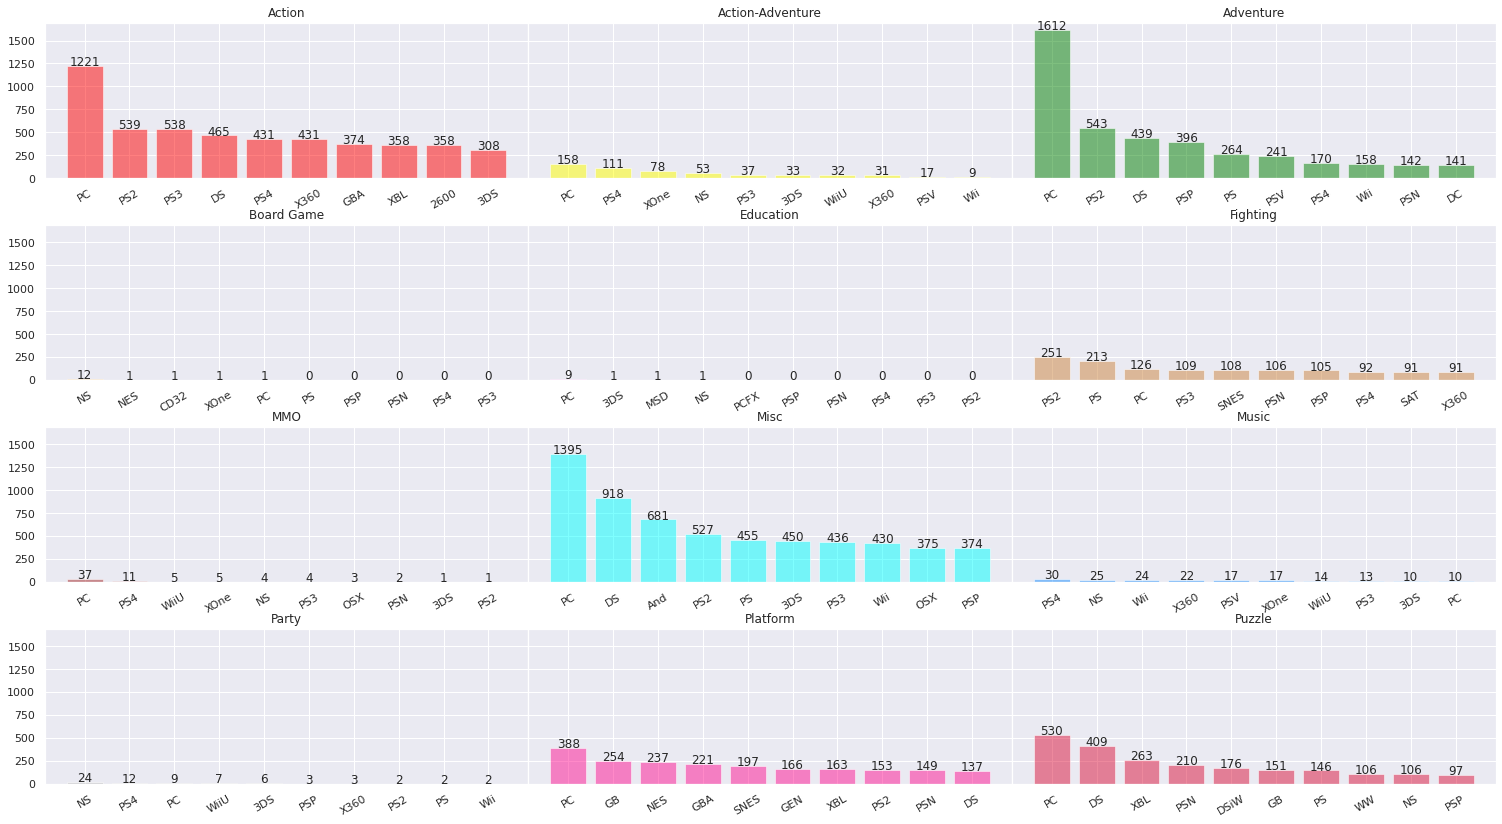

In [ ]:
res = pd.crosstab(vgsales['Platform'], vgsales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(26, 14), sharey=True)
#CORES = 
for i in range(4):
    for j in range(3):
        rec = res.iloc[:, i*3+j].sort_values(ascending=False)[:10]
        axes[i, j].bar(rec.index, rec.values, color= colors_genre[i*3+j] , alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=12)
        axes[i, j].tick_params(axis='x', rotation=30)
        add_bar_label(axes[i, j], rec, yincr=3, fontsize='medium')
fig.subplots_adjust(hspace=0.3, wspace=0)

Interpretation:

The chart above shows the top 10 platforms with the most physical games published by genre.

For example, we can see that PS3 is the main modal platform for Action as 380 unique action game titles are designed for this console.

# REGION AND GAMES ANALYSIS


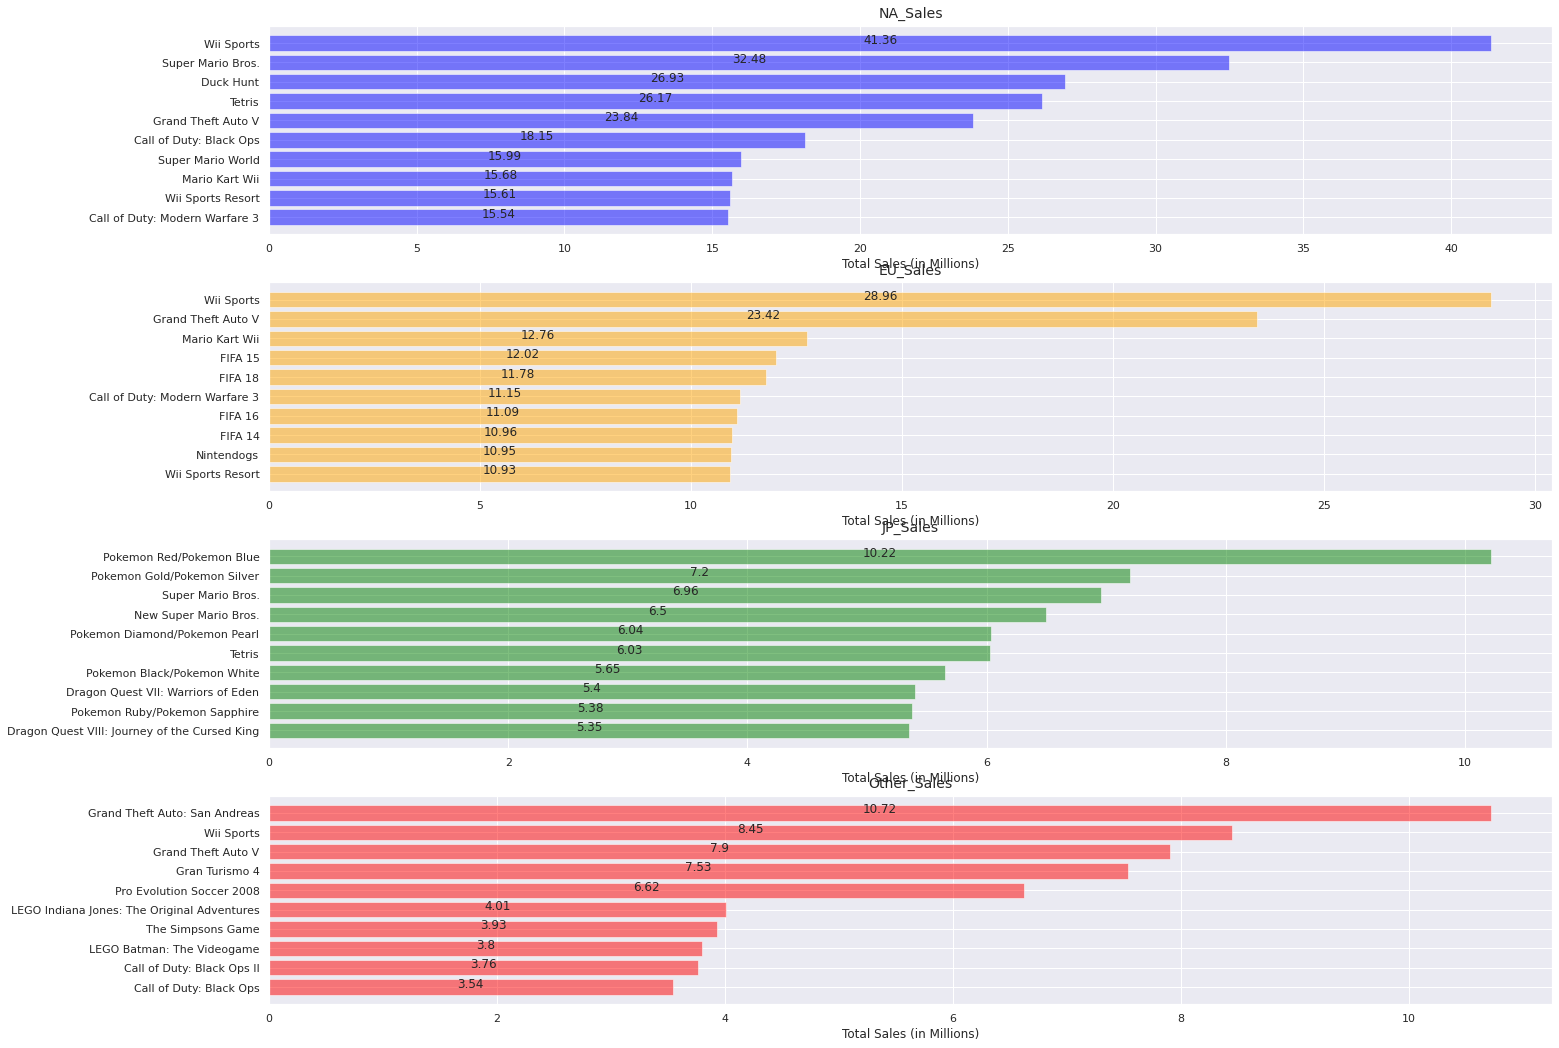

In [ ]:
# Top 10 games with highest sales for each region:
colors_region = ['blue', 'orange', 'green', 'red']
res = vgsales.groupby('Name')[['NA_Sales', 'EU_Sales', 
                                     'JP_Sales', 'Other_Sales']]
res = res.sum()
fig, axes = plt.subplots(4, 1, figsize=(23, 18))
for i in range(4):
    rec = res.iloc[:, i].sort_values()[-10:]
    axes[i].barh(rec.index, rec.values, color=colors_region[i], alpha=0.5)
    axes[i].set_title(rec.name, fontsize=14, y=1.01)
    axes[i].set_xlabel('Total Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=11)
    axes[i].tick_params(axis='y', labelsize=11)
    for j in rec.index:
        axes[i].text(rec.loc[j] / 2, j, round(rec.loc[j], 2), 
                     ha='center')
    #add_bar_label(axes[i], rec, xincr=0.8, isbarh=True)
fig.subplots_adjust(hspace=0.23)

3. Summary and Conclusion
In summary, we explored many different facets of the video game market:

* Region: North America has the highest sales of all regions
* Platform: PS2 and Xbox 360 have the highest global sales
* Cross-platform: Video games with cross-platform releases can sell very differently depending on the type of game.
* Genre: The action genre has the highest total sales, but by average sales, the platform genre has the best
Genre and Platform: Certain genres perform much better on cetrain platforms. Most notably, platform video games on the Nintendo Gameboy and NES, as well as action games on the PS2, PS3, and Xbox 360
* Rating: The average 'M' rated video game has the highest sales.
* Developers: EA and Nintendo have the highest total sales of any developer
* Score: Both have similar distributions with a negative slope.
* Popular Games: Wii Sprots is the best-selling game of all time with global sales of $82.53 million
I hope you find this review interesting and perhaps useful for those looking to make video games in the future.


Note that all but shooting games have a negative bias; however, for many of the genres, there is a large spike (an outlier) before 1995. This initial spike in the data is affecting the slope of trends and is not as relevant to recent sales. As a precaution, the same analysis can be performed from 1995 onwards and will still include more than 90% of total global sales.

Even after excluding the years before 1995, all games except Shooter showed a decline in sales. However, after excluding the years prior to 1995, the severity of the decline in all but the sports genre decreased. Of the declining genres, Simulation, RPG, Racing and Action games saw the sharpest decline in sales.

3.0 Conclusion With the exception of shooters, global sales of all other video game genres are in decline. This could be due to the increase in games being played on tablets and smartphones. First-person shooters are not easily played with touchscreen controls, making them unaffected by the increasing popularity of using tablets and smartphones as a gaming platform. It would be interesting to find a dataset that has global game downloads for tablets and smartphones and compare it to that dataset.